In [1]:
#  USDINR -  Open, High, Low, Close and Volume

In [2]:
!pip install statsmodels

In [3]:
import yfinance as yf
import seaborn as sn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning) 
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.SARIMAX',
                        FutureWarning)

In [5]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [6]:
################################################### Open Values##################################################

In [7]:
df= yf.download("INR=X", period = "3mo", interval="1d")
df= df.to_csv('C:\\Users\\Admin\\Documents\\PYTHON\\California birth rate stock\\usdinr.csv')
f_birth = pd.read_csv('usdinr.csv', parse_dates= [0], index_col=[0])

#f_birth = pd.read_df('df', parse_dates= [0], index_col=[0])

[*********************100%***********************]  1 of 1 completed


In [8]:
f_birth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,73.603600,74.092003,73.512802,73.603600,73.603600,0
2020-12-22,73.935303,74.202301,73.786697,73.935303,73.935303,0
2020-12-23,74.005501,74.269997,73.646400,74.269997,74.269997,0
2020-12-24,73.839798,74.099998,73.450798,73.839798,73.839798,0
2020-12-25,73.557800,73.800003,73.550003,73.557800,73.557800,0


In [9]:
f_birth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,72.682999,72.781998,72.392303,72.682999,72.682999,0
2021-03-16,72.515297,72.945999,72.365501,72.515297,72.515297,0
2021-03-17,72.515701,73.008003,72.496300,72.515602,72.515602,0
2021-03-18,72.569801,72.744003,72.295601,72.295601,72.295601,0
2021-03-19,72.669998,72.703003,72.402000,72.459999,72.459999,0


In [10]:
f_birth = f_birth.drop(["Close","High","Low","Adj Close", "Volume"], axis=1) # Considering only Open Values

In [11]:
f_birth

,Open
Date,
2020-12-21,73.603600
2020-12-22,73.935303
2020-12-23,74.005501
2020-12-24,73.839798
2020-12-25,73.557800
...,...
2021-03-15,72.682999
2021-03-16,72.515297
2021-03-17,72.515701


In [12]:
f_birth.tail()

,Open
Date,
2021-03-15,72.682999
2021-03-16,72.515297
2021-03-17,72.515701
2021-03-18,72.569801
2021-03-19,72.669998


In [13]:
f_birth.Open

Date
2020-12-21    73.603600
2020-12-22    73.935303
2020-12-23    74.005501
2020-12-24    73.839798
2020-12-25    73.557800
                ...    
2021-03-15    72.682999
2021-03-16    72.515297
2021-03-17    72.515701
2021-03-18    72.569801
2021-03-19    72.669998
Name: Open, Length: 65, dtype: float64

In [14]:
f_birth.count()

Open    65
dtype: int64

In [15]:
f_birth.describe()

,Open
count,65.000000
mean,73.057679
std,0.393143
min,72.382103
25%,72.784798
50%,72.995903
75%,73.277496
max,74.005501


In [16]:
f_birth.mode()

,Open
0,72.382103
1,72.395599
2,72.457901
3,72.515297
4,72.515701
...,...
60,73.730003
61,73.778999
62,73.839798
63,73.935303


In [17]:
type(f_birth.Open)  # pandas.core.series.Series

pandas.core.series.Series

In [18]:
#Convret dataframe into series which is needed by models.

In [19]:
f_birth_series = f_birth.values
# f_birth_series

In [20]:
# Visualise the trend

<AxesSubplot:xlabel='Date'>

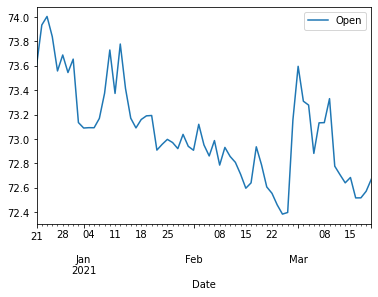

In [21]:
f_birth.plot()

<AxesSubplot:xlabel='Date'>

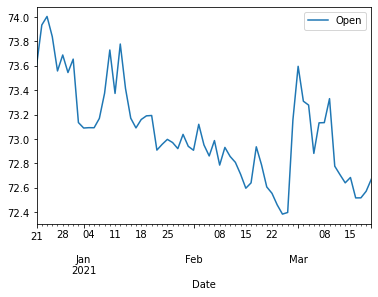

In [22]:
f_birth.plot(kind="line")

<AxesSubplot:xlabel='Date'>

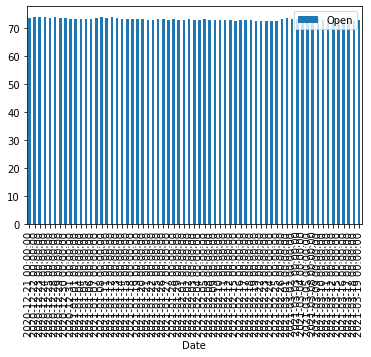

In [23]:
f_birth.plot(kind="bar")

<AxesSubplot:ylabel='Date'>

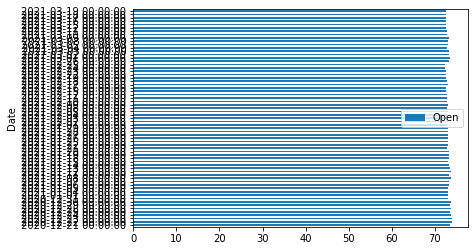

In [24]:
f_birth.plot(kind="barh")

<AxesSubplot:ylabel='Frequency'>

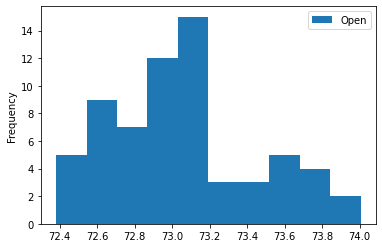

In [25]:
f_birth.plot(kind="hist")

<AxesSubplot:>

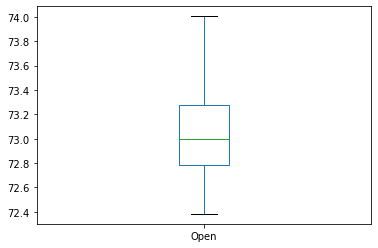

In [26]:
f_birth.plot(kind="box")

C:\Users\Admin\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

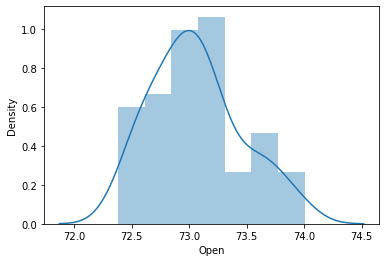

In [27]:
import seaborn as sb
sb.distplot(f_birth['Open'], kde= True)

<AxesSubplot:ylabel='Density'>

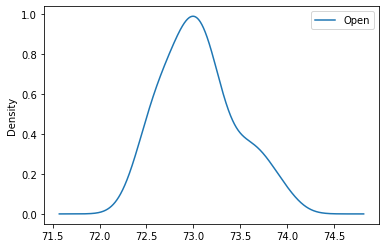

In [28]:
f_birth.plot(kind="kde")

<AxesSubplot:xlabel='Date'>

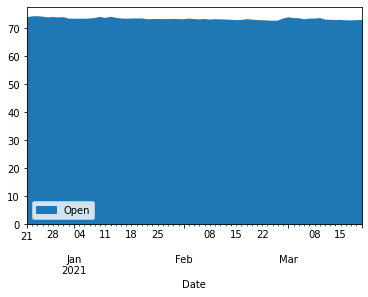

In [29]:
f_birth.plot(kind="area")

<AxesSubplot:xlabel='Date'>

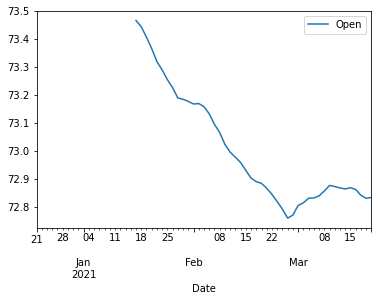

In [30]:
f_birth_mean = f_birth.rolling(window = 20).mean() # easier to observe the trend
f_birth_mean.plot()

# Decompose time series into its components

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [32]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(f_birth['Open'], model='multiplicative', extrapolate_trend='freq', period=int(len(f_birth)/2))

In [33]:
# Additive Decomposition
result_add = seasonal_decompose(f_birth['Open'], model='additive', extrapolate_trend='freq', period=int(len(f_birth)/2))

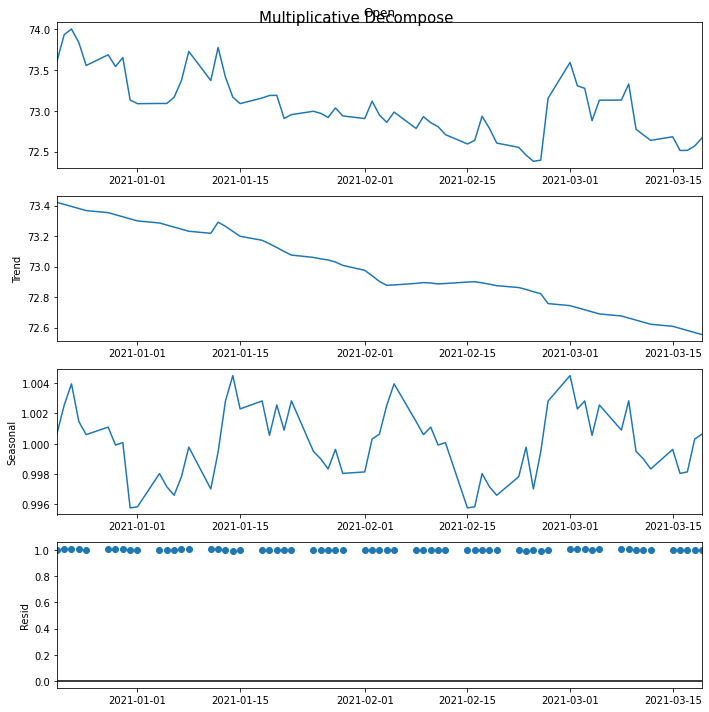

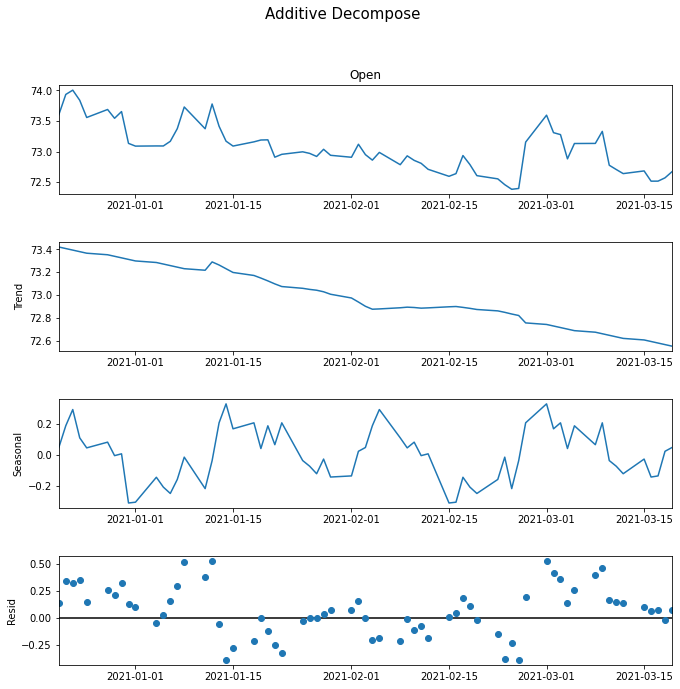

In [34]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
plt.tight_layout(pad=3.08)
plt.show()


Residuals of the additive decomposition has some pattern left over.
The multiplicative decomposition, however, looks quite random which is good.
So ideally, multiplicative decomposition should be preferred for this particular series'


# Simple prediction uing shift function. Baseline model

In [35]:
f_birth_baseline = f_birth.copy()

In [36]:
f_birth_baseline['Open_forecast'] = f_birth_baseline['Open'].shift(1)

In [37]:
f_birth_baseline.head()

,Open,Open_forecast
Date,,
2020-12-21,73.603600,NaN
2020-12-22,73.935303,73.603600
2020-12-23,74.005501,73.935303
2020-12-24,73.839798,74.005501
2020-12-25,73.557800,73.839798


In [38]:
# Calculate mean squared error of this simple baseline model

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [40]:
f_birth_baseline.dropna(inplace=True) # drop nan value

In [41]:
f_birth_baseline_error = np.sqrt(mean_squared_error(f_birth_baseline['Open'], f_birth_baseline['Open_forecast'])) # take square root of mse
f_birth_baseline_error

0.22203551645789246

# ARIMA Autoregressive(p) Integrated(d) Moving average(q)

#### Finding p,d,q values for a simple model

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import root_mean_square_error
#from statsmodels.tsa.stattools import r_square_error
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller

In [43]:
f_birth.head()

,Open
Date,
2020-12-21,73.603600
2020-12-22,73.935303
2020-12-23,74.005501
2020-12-24,73.839798
2020-12-25,73.557800


In [44]:
result = adfuller(f_birth_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.453949
p-value: 0.127085


In [45]:
# as p value is less than 0.05 we can say the data is stationary

#### plot_acf to calculate thevalue of p

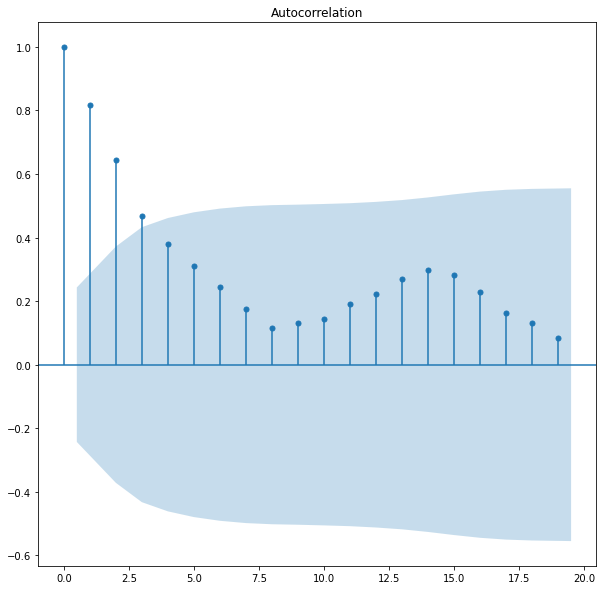

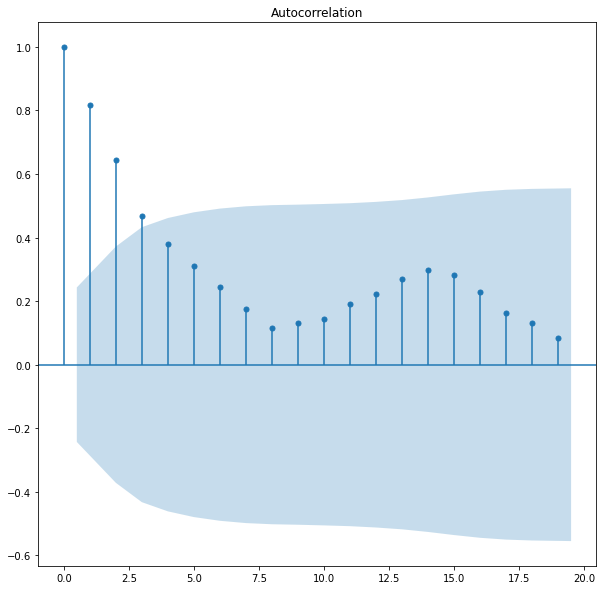

In [46]:
plot_acf(f_birth_series)

In [47]:
# p value could be 2,3

#### plot_pacf is to calculate value of q

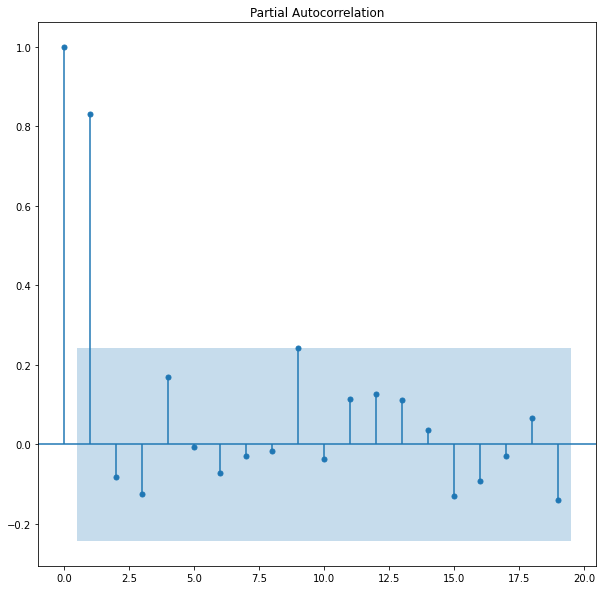

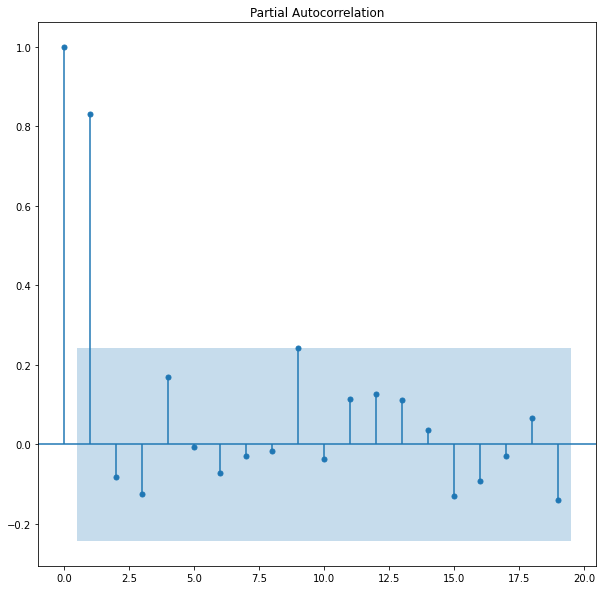

In [48]:
plot_pacf(f_birth_series)

In [49]:
# q  value could be 2,3

# Simple Modelling

In [50]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels as sm
import warnings

In [51]:
# Split the dataset
split = int(len(f_birth_series) * 0.9)
f_birth_series_train = f_birth_series[:split]
f_birth_series_test = f_birth_series[split:]

In [52]:
model = ARIMA(f_birth_series_train, order=(1,1,2))
model_fit = model.fit()
print('AIC Score', model_fit.aic)
print('BIC Score', model_fit.bic)

model_forecast = model_fit.forecast(steps=5)[0]
# model_forecast 
#print('RMSE -', np.sqrt(mean_squared_error(f_birth_series_test, model_forecast)))
#print('R2ERROR -', np(r_squared_error(f_birth_series_test, model_forecast)))
#print('MAPE -', np.sqrt(mean_absolute_percentage_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('hqic_sigma', model_fit.hqic_sigma)
#print('interquartile range of error', model_fit.iqr)

C:\Users\Admin\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


AIC Score -1.5330266469780156
BIC Score 8.682229692194735


C:\Users\Admin\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [53]:
model_forecast # Open values

array([72.72840316, 72.70870891, 72.69070802, 72.6738662 , 72.65781774])

# Modelling using a function to hyper tune the ARIMA parameters, split data

In [54]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = np.sqrt(mean_squared_error(test, predictions))
    return error




# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [55]:
p_values = [1]
d_values = [1] # range(0, 2)
q_values = [2] # range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(f_birth_series, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [56]:
############################################### High Values ############################################################

In [57]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning) 
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.SARIMAX',
                        FutureWarning)

In [58]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [59]:
df= yf.download("INR=X", period = "3mo", interval="1d")
df= df.to_csv('C:\\Users\\Admin\\Documents\\PYTHON\\California birth rate stock\\usdinr.csv')
f_birth = pd.read_csv('usdinr.csv', parse_dates= [0], index_col=[0])

#f_birth = pd.read_df('df', parse_dates= [0], index_col=[0])

[*********************100%***********************]  1 of 1 completed


In [60]:
f_birth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,73.603600,74.092003,73.512802,73.603600,73.603600,0
2020-12-22,73.935303,74.202301,73.786697,73.935303,73.935303,0
2020-12-23,74.005501,74.269997,73.646400,74.269997,74.269997,0
2020-12-24,73.839798,74.099998,73.450798,73.839798,73.839798,0
2020-12-25,73.557800,73.800003,73.550003,73.557800,73.557800,0


In [61]:
f_birth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,72.682999,72.781998,72.392303,72.682999,72.682999,0
2021-03-16,72.515297,72.945999,72.365501,72.515297,72.515297,0
2021-03-17,72.515701,73.008003,72.496300,72.515602,72.515602,0
2021-03-18,72.569801,72.744003,72.295601,72.295601,72.295601,0
2021-03-19,72.669998,72.703003,72.402000,72.459999,72.459999,0


In [62]:
f_birth = f_birth.drop(["Open","Low","Close","Adj Close", "Volume"], axis=1) # Considering only High values

In [63]:
f_birth

,High
Date,
2020-12-21,74.092003
2020-12-22,74.202301
2020-12-23,74.269997
2020-12-24,74.099998
2020-12-25,73.800003
...,...
2021-03-15,72.781998
2021-03-16,72.945999
2021-03-17,73.008003


In [64]:
f_birth.High

Date
2020-12-21    74.092003
2020-12-22    74.202301
2020-12-23    74.269997
2020-12-24    74.099998
2020-12-25    73.800003
                ...    
2021-03-15    72.781998
2021-03-16    72.945999
2021-03-17    73.008003
2021-03-18    72.744003
2021-03-19    72.703003
Name: High, Length: 65, dtype: float64

In [65]:
f_birth.count()

High    65
dtype: int64

In [66]:
f_birth.describe()

,High
count,65.000000
mean,73.255959
std,0.429740
min,72.556503
25%,72.990402
50%,73.203400
75%,73.415298
max,74.269997


In [67]:
f_birth.mode()

,High
0,73.319801


In [68]:
type(f_birth.High)  # pandas.core.series.Series

pandas.core.series.Series

In [69]:
#Convret dataframe into series which is needed by models.

In [70]:
f_birth_series = f_birth.values
# f_birth_series

In [71]:
# Visualise the Trend

<AxesSubplot:xlabel='Date'>

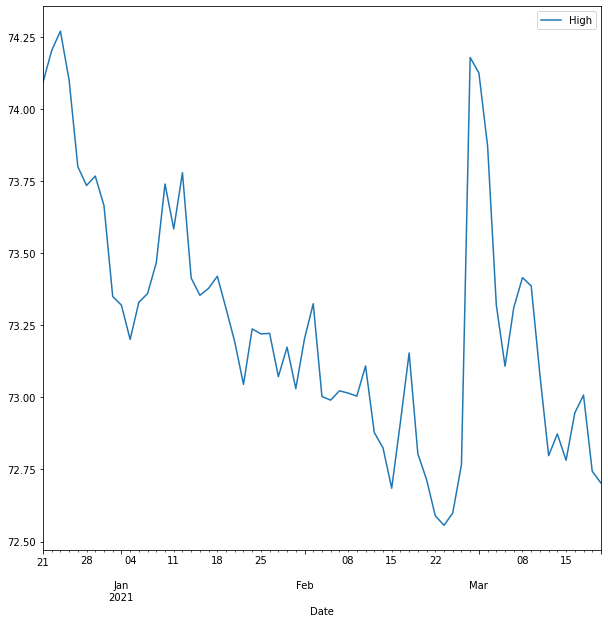

In [72]:
f_birth.plot()

<AxesSubplot:xlabel='Date'>

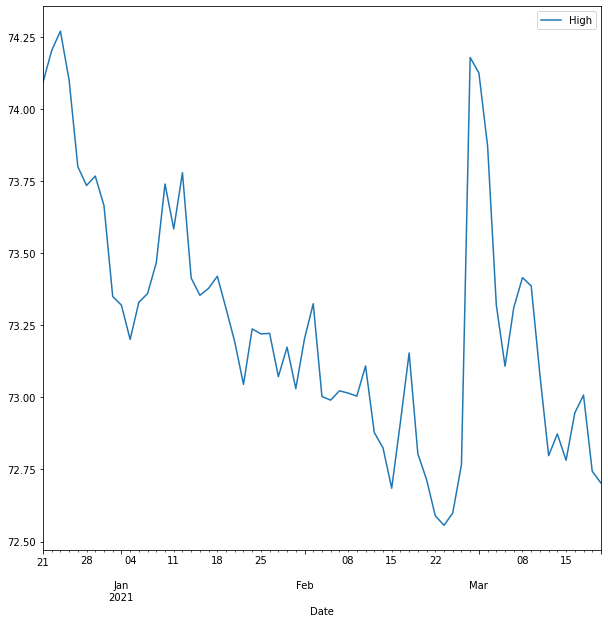

In [73]:
f_birth.plot(kind="line")

<AxesSubplot:xlabel='Date'>

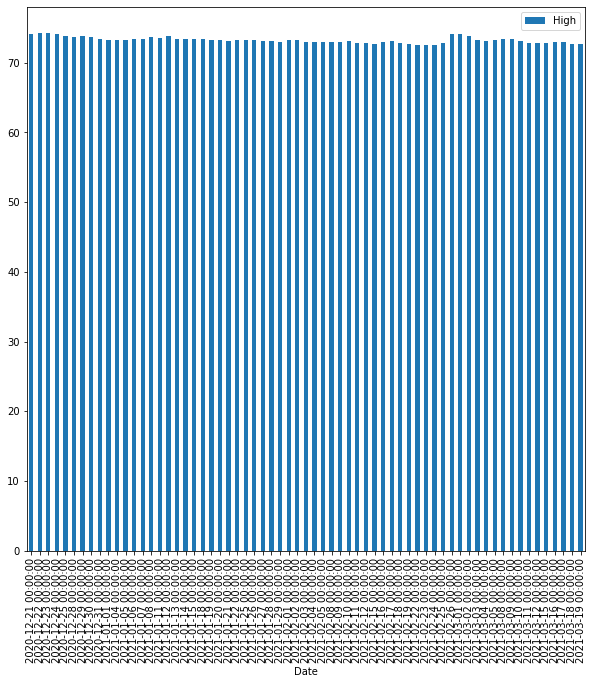

In [74]:
f_birth.plot(kind="bar")

<AxesSubplot:ylabel='Date'>

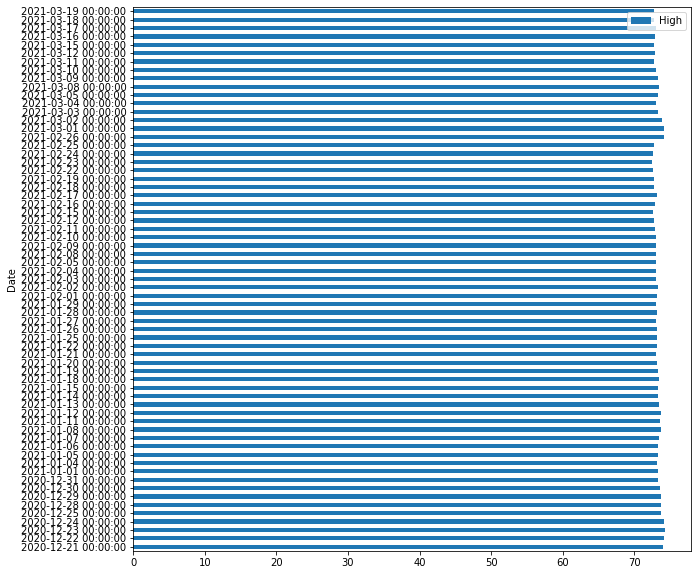

In [75]:
f_birth.plot(kind="barh")

<AxesSubplot:ylabel='Frequency'>

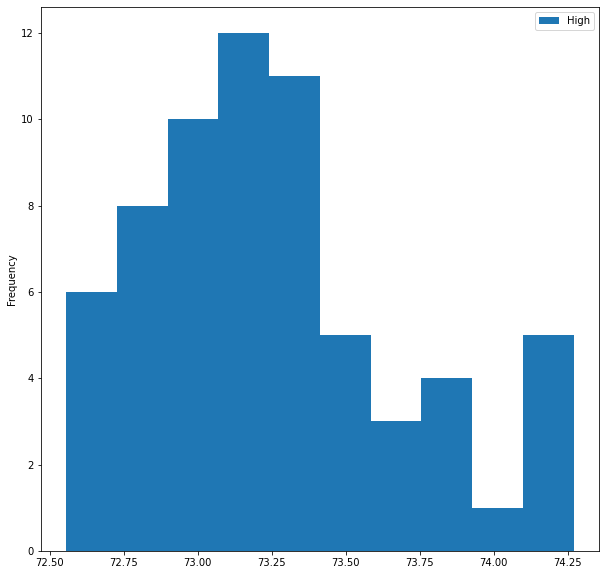

In [76]:
f_birth.plot(kind="hist")

<AxesSubplot:>

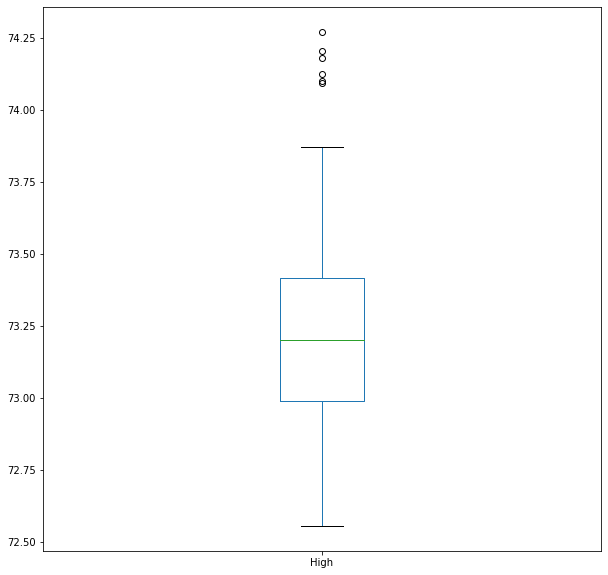

In [77]:
f_birth.plot(kind="box")

<AxesSubplot:xlabel='High', ylabel='Density'>

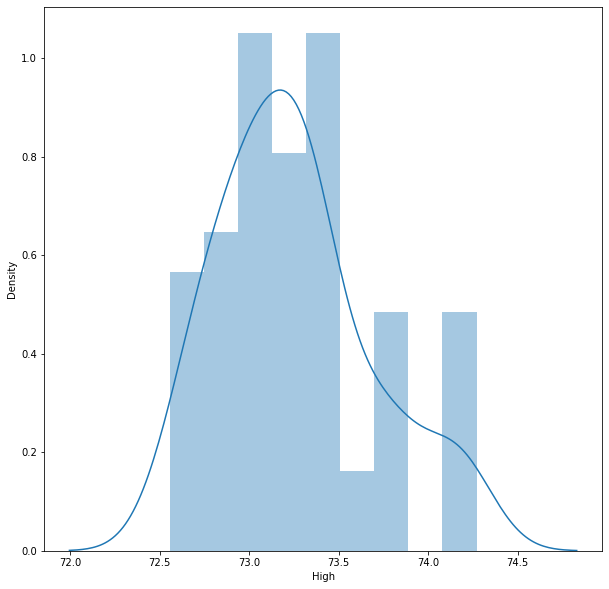

In [79]:
import seaborn as sb
sb.distplot(f_birth['High'], kde= True)

<AxesSubplot:ylabel='Density'>

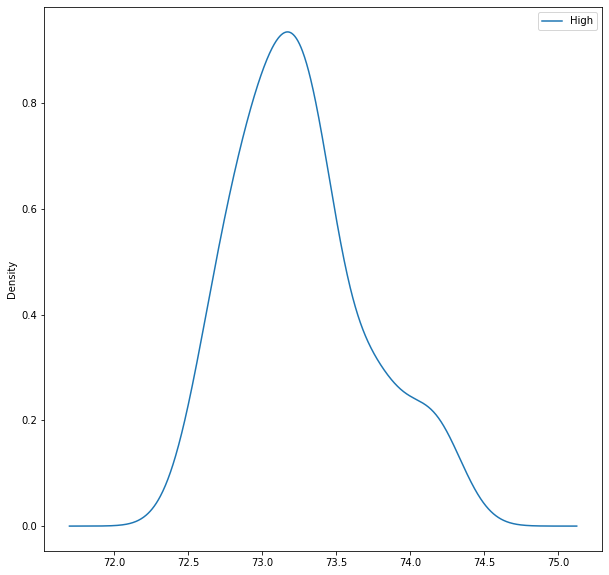

In [80]:
f_birth.plot(kind="kde")

<AxesSubplot:xlabel='Date'>

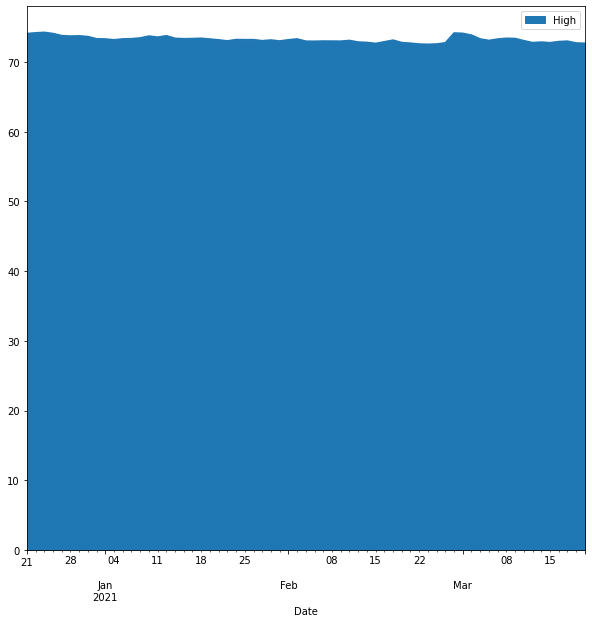

In [81]:
f_birth.plot(kind="area")

<AxesSubplot:xlabel='Date'>

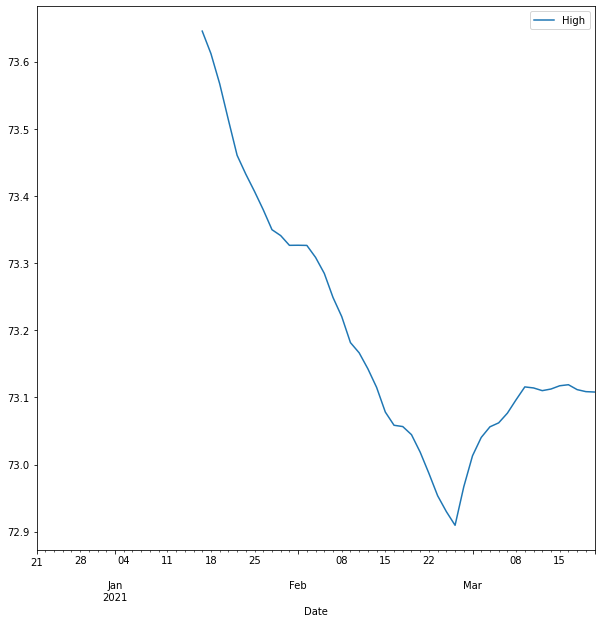

In [82]:
f_birth_mean = f_birth.rolling(window = 20).mean() # easier to observe the trend
f_birth_mean.plot()

In [83]:
# Decompose time series into its components

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [86]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(f_birth['High'], model='multiplicative', extrapolate_trend='freq', period=int(len(f_birth)/2))

In [87]:
# Additive Decomposition
result_add = seasonal_decompose(f_birth['High'], model='additive', extrapolate_trend='freq', period=int(len(f_birth)/2))

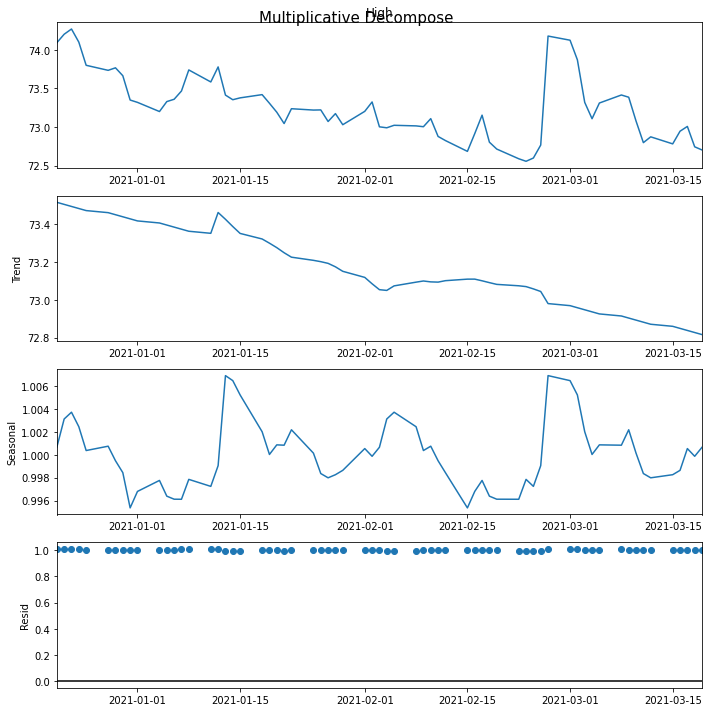

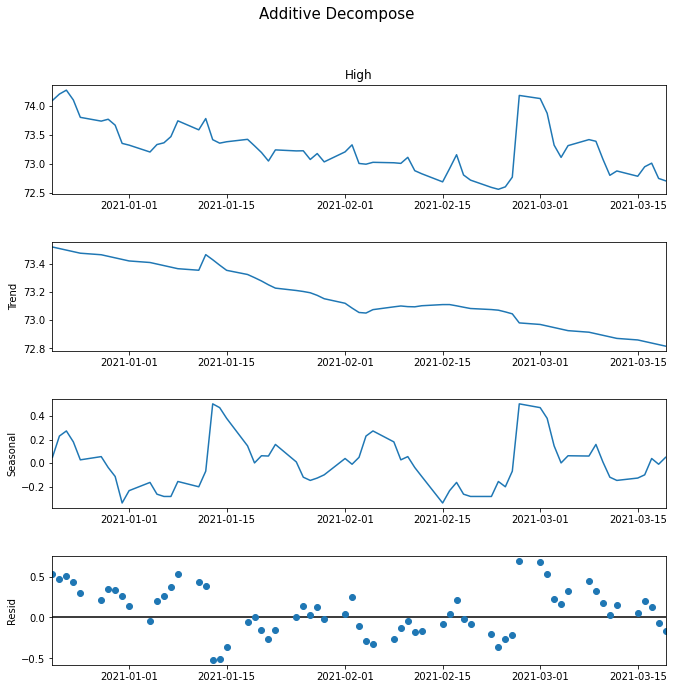

In [88]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
plt.tight_layout(pad=3.08)
plt.show()


In [89]:
# Simple prediction uing shift function. Baseline model

In [90]:
f_birth_baseline = f_birth.copy()

In [91]:
f_birth_baseline['High_forecast'] = f_birth_baseline['High'].shift(1)

In [92]:
f_birth_baseline.head()

,High,High_forecast
Date,,
2020-12-21,74.092003,NaN
2020-12-22,74.202301,74.092003
2020-12-23,74.269997,74.202301
2020-12-24,74.099998,74.269997
2020-12-25,73.800003,74.099998


In [93]:
# Calculate mean squared error of this simple baseline model

In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [95]:
f_birth_baseline.dropna(inplace=True) # drop nan value

In [97]:
f_birth_baseline_error = np.sqrt(mean_squared_error(f_birth_baseline['High'], f_birth_baseline['High_forecast'])) # take square root of mse
f_birth_baseline_error

0.24951822203246607

In [98]:
# ARIMA Autoregressive(p) Integrated(d) Moving average(q)
#Finding p,d,q values for a simple model

In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import root_mean_square_error
#from statsmodels.tsa.stattools import r_square_error
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller

In [100]:
f_birth.head()

,High
Date,
2020-12-21,74.092003
2020-12-22,74.202301
2020-12-23,74.269997
2020-12-24,74.099998
2020-12-25,73.800003


In [101]:
result = adfuller(f_birth_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.283827
p-value: 0.015617


In [102]:
# chek for p value, it the p value is less than 0.05 we can say the data is stationary

In [103]:
# # as p value is less than 0.05 we can say the data is stationary


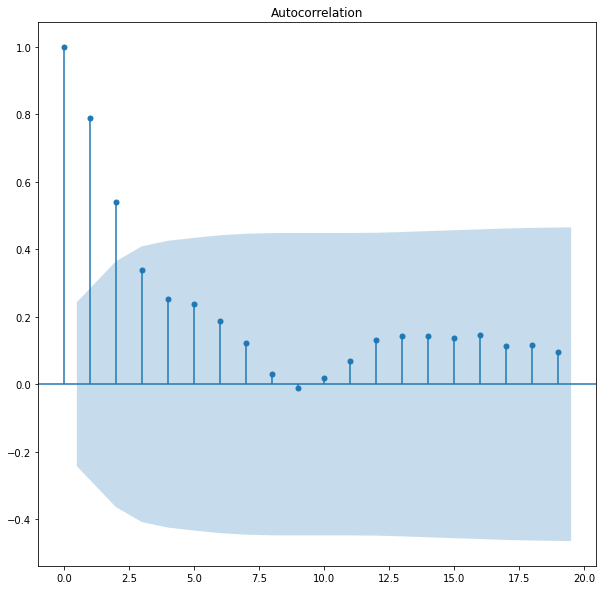

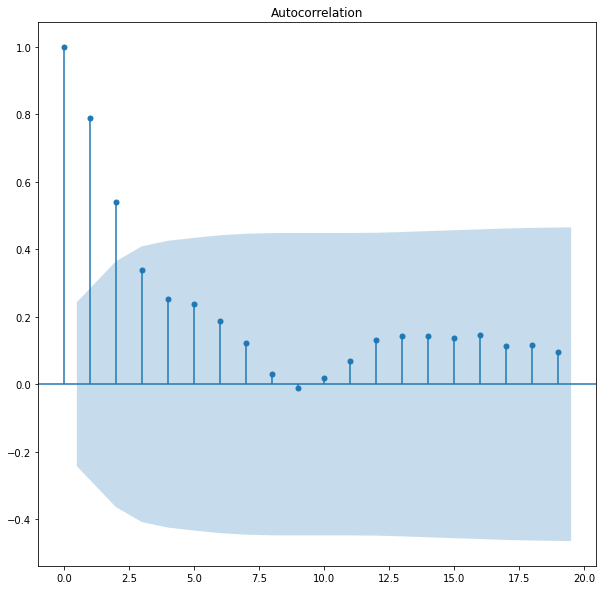

In [104]:
plot_acf(f_birth_series)

In [ ]:
# p value could be 2,3

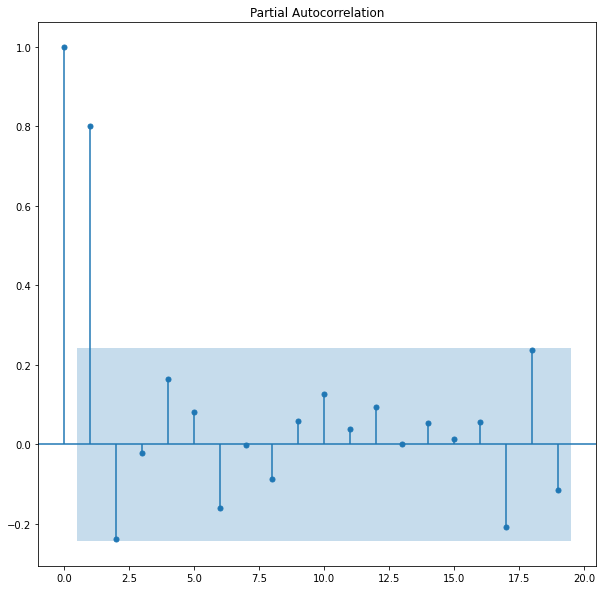

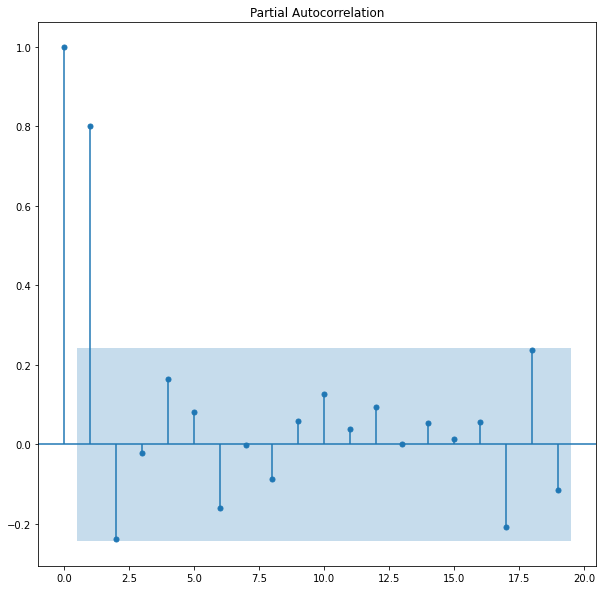

In [105]:
# plot_pacf is to calculate value of q
plot_pacf(f_birth_series)

In [106]:
# q  value could be 2,3

In [107]:
# Simple Modelling

In [108]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels as sm
import warnings

In [109]:
# Split the dataset
split = int(len(f_birth_series) * 0.9)
f_birth_series_train = f_birth_series[:split]
f_birth_series_test = f_birth_series[split:]

In [110]:
model = ARIMA(f_birth_series_train, order=(1,1,2))
model_fit = model.fit()
print('AIC Score', model_fit.aic)
print('BIC Score', model_fit.bic)

model_forecast = model_fit.forecast(steps=5)[0]
# model_forecast 
#print('RMSE -', np.sqrt(mean_squared_error(f_birth_series_test, model_forecast)))
#print('R2ERROR -', np(r_squared_error(f_birth_series_test, model_forecast)))
#print('MAPE -', np.sqrt(mean_absolute_percentage_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('hqic_sigma', model_fit.hqic_sigma)
#print('interquartile range of error', model_fit.iqr)

AIC Score 9.795136544353511
BIC Score 20.01039288352626


In [111]:
model_forecast # High values

array([72.97859091, 72.94665807, 72.92036444, 72.89793758, 72.87816217])

In [112]:
# Modelling using a function to hyper tune the ARIMA parameters, split data

In [113]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = np.sqrt(mean_squared_error(test, predictions))
    return error




# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [114]:
p_values = [1]
d_values = [1] # range(0, 2)
q_values = [2] # range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(f_birth_series, p_values, d_values, q_values)

ARIMA(1, 1, 2) RMSE=0.355
Best ARIMA(1, 1, 2) RMSE=0.355


In [115]:
####################### Low Values###############################################################################

In [116]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning) 
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.SARIMAX',
                        FutureWarning)

In [117]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [118]:
df= yf.download("INR=X", period = "3mo", interval="1d")
df= df.to_csv('C:\\Users\\Admin\\Documents\\PYTHON\\California birth rate stock\\usdinr.csv')
f_birth = pd.read_csv('usdinr.csv', parse_dates= [0], index_col=[0])

#f_birth = pd.read_df('df', parse_dates= [0], index_col=[0])

[*********************100%***********************]  1 of 1 completed


In [119]:
f_birth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,73.603600,74.092003,73.512802,73.603600,73.603600,0
2020-12-22,73.935303,74.202301,73.786697,73.935303,73.935303,0
2020-12-23,74.005501,74.269997,73.646400,74.269997,74.269997,0
2020-12-24,73.839798,74.099998,73.450798,73.839798,73.839798,0
2020-12-25,73.557800,73.800003,73.550003,73.557800,73.557800,0


In [120]:
f_birth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,72.682999,72.781998,72.392303,72.682999,72.682999,0
2021-03-16,72.515297,72.945999,72.365501,72.515297,72.515297,0
2021-03-17,72.515701,73.008003,72.496300,72.515602,72.515602,0
2021-03-18,72.569801,72.744003,72.295601,72.295601,72.295601,0
2021-03-19,72.669998,72.703003,72.402000,72.459999,72.459999,0


In [121]:
f_birth = f_birth.drop(["Open","High","Close","Adj Close", "Volume"], axis=1) # Considering only Low values

In [122]:
f_birth

,Low
Date,
2020-12-21,73.512802
2020-12-22,73.786697
2020-12-23,73.646400
2020-12-24,73.450798
2020-12-25,73.550003
...,...
2021-03-15,72.392303
2021-03-16,72.365501
2021-03-17,72.496300


In [123]:
f_birth.Low

Date
2020-12-21    73.512802
2020-12-22    73.786697
2020-12-23    73.646400
2020-12-24    73.450798
2020-12-25    73.550003
                ...    
2021-03-15    72.392303
2021-03-16    72.365501
2021-03-17    72.496300
2021-03-18    72.295601
2021-03-19    72.402000
Name: Low, Length: 65, dtype: float64

In [124]:
f_birth.count()

Low    65
dtype: int64

In [125]:
f_birth.describe()

,Low
count,65.000000
mean,72.863312
std,0.350173
min,72.267998
25%,72.612198
50%,72.825996
75%,73.062798
max,73.786697


In [126]:
f_birth.mode()

,Low
0,72.778000
1,72.877998


In [127]:
type(f_birth.Low)  # pandas.core.series.Series

pandas.core.series.Series

In [128]:
#Convret dataframe into series which is needed by models.

In [129]:
f_birth_series = f_birth.values
# f_birth_series

In [130]:
# Visualise the Trend

<AxesSubplot:xlabel='Date'>

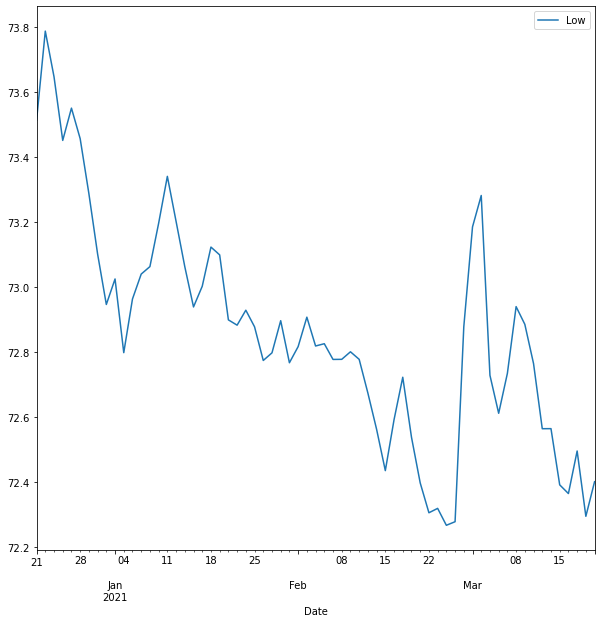

In [131]:
f_birth.plot()

<AxesSubplot:xlabel='Date'>

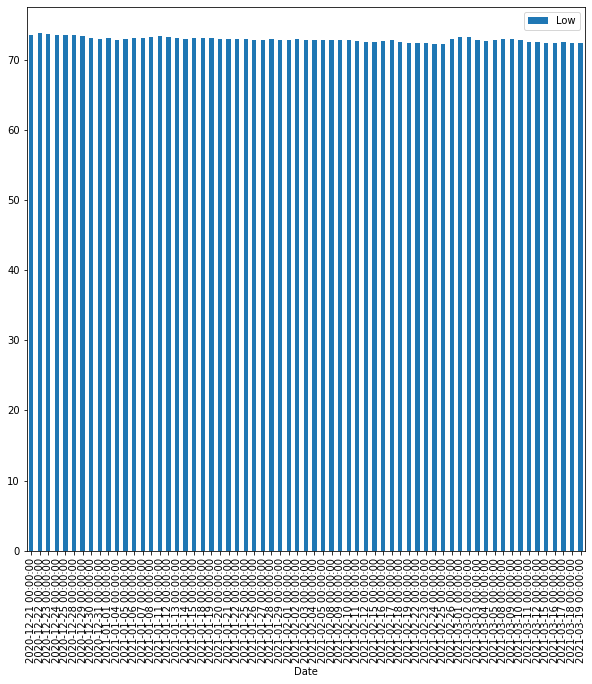

In [132]:
f_birth.plot(kind="bar")

<AxesSubplot:ylabel='Date'>

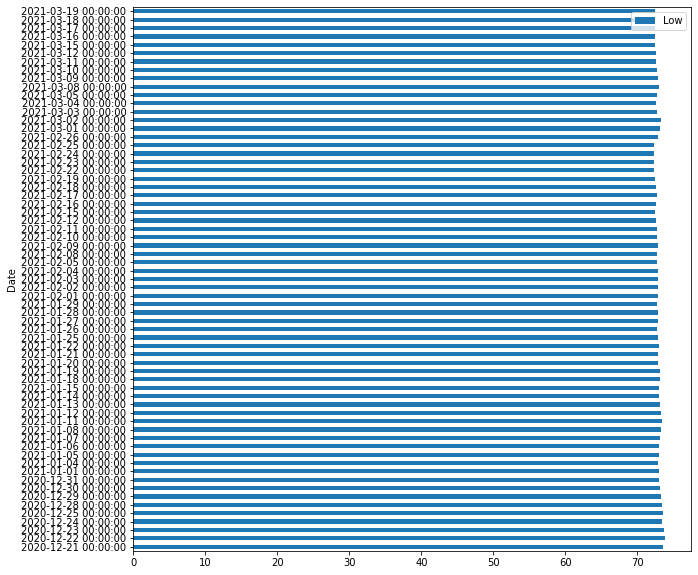

In [133]:
f_birth.plot(kind="barh")

<AxesSubplot:ylabel='Frequency'>

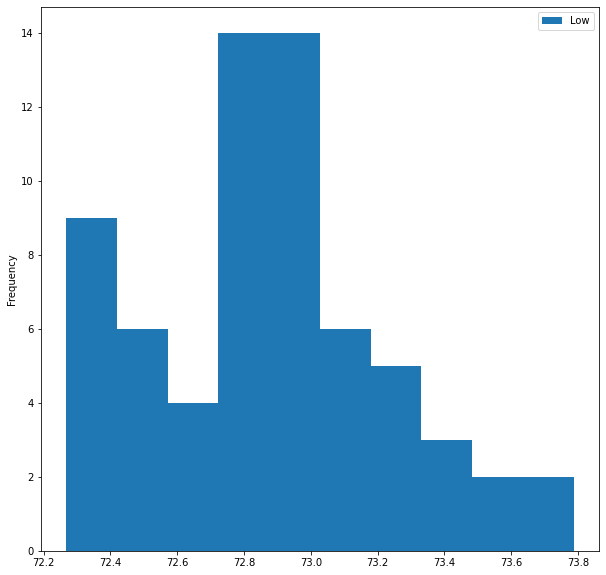

In [134]:
f_birth.plot(kind="hist")

<AxesSubplot:xlabel='Date'>

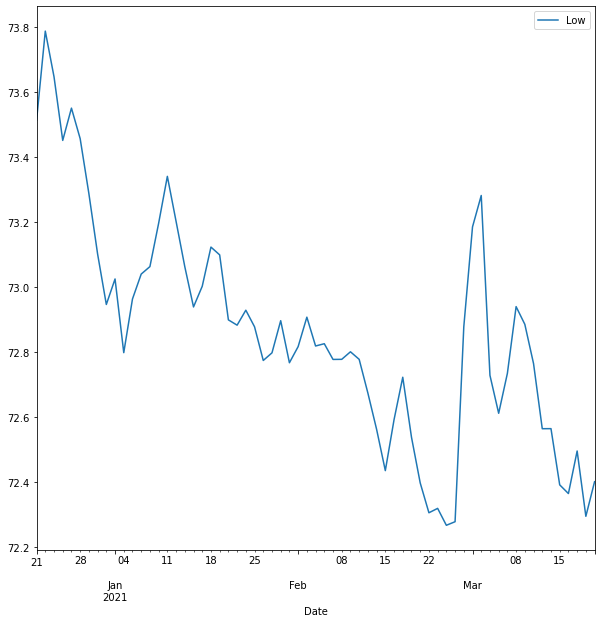

In [135]:
f_birth.plot(kind="line")

<AxesSubplot:>

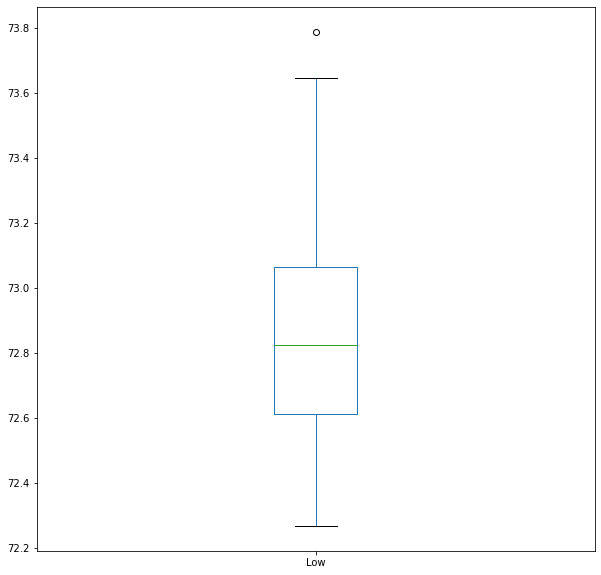

In [136]:
f_birth.plot(kind="box")

<AxesSubplot:xlabel='Low', ylabel='Density'>

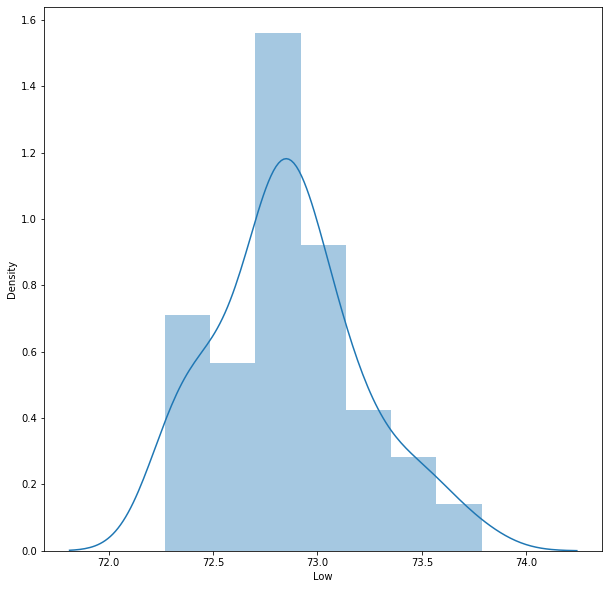

In [137]:
import seaborn as sb
sb.distplot(f_birth['Low'], kde= True)

<AxesSubplot:ylabel='Density'>

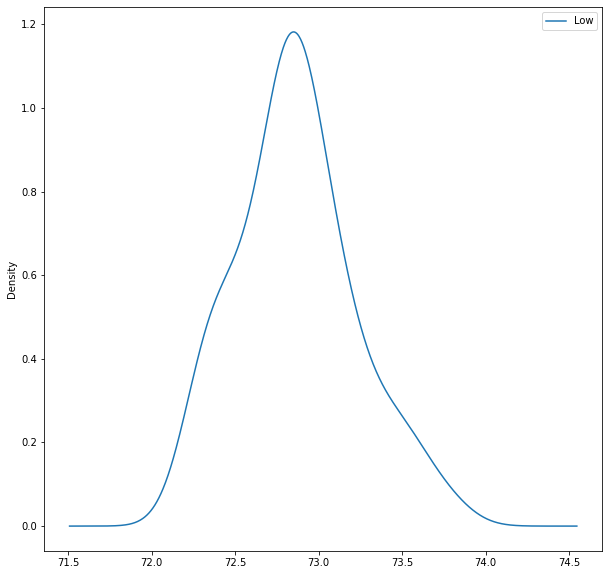

In [138]:
f_birth.plot(kind="kde")

<AxesSubplot:xlabel='Date'>

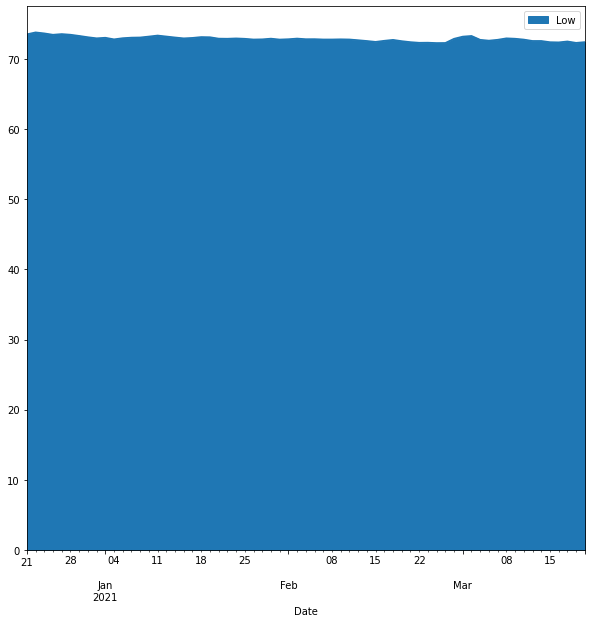

In [139]:
f_birth.plot(kind="area")

<AxesSubplot:xlabel='Date'>

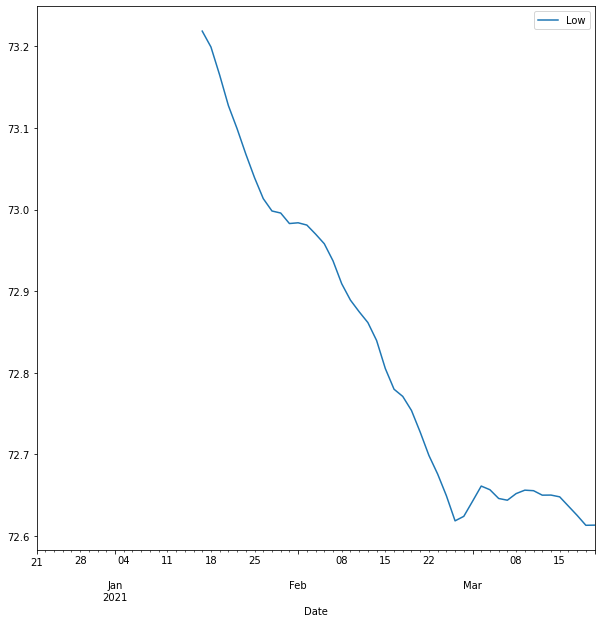

In [140]:
f_birth_mean = f_birth.rolling(window = 20).mean() # easier to observe the trend
f_birth_mean.plot()

In [141]:
# Decompose time series into its components

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [143]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(f_birth['Low'], model='multiplicative', extrapolate_trend='freq', period=int(len(f_birth)/2))

In [144]:
# Additive Decomposition
result_add = seasonal_decompose(f_birth['Low'], model='additive', extrapolate_trend='freq', period=int(len(f_birth)/2))

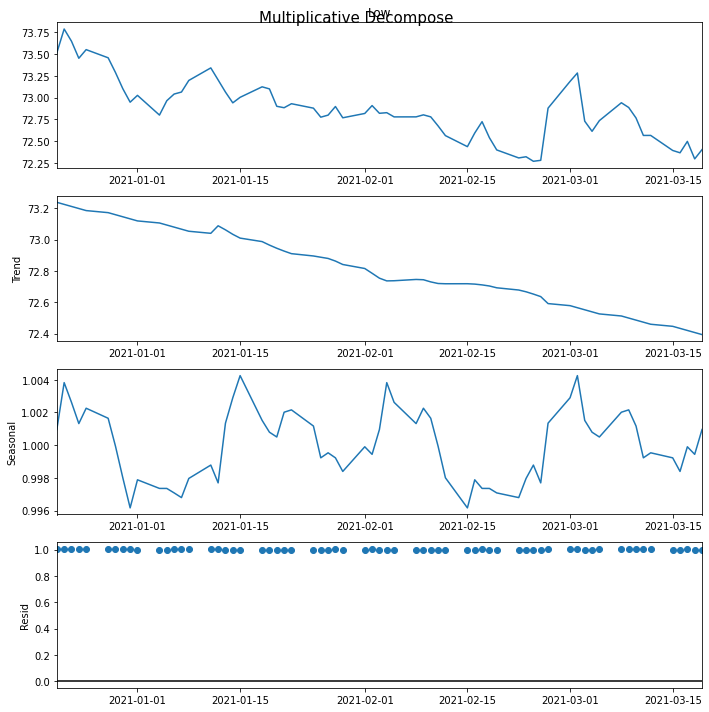

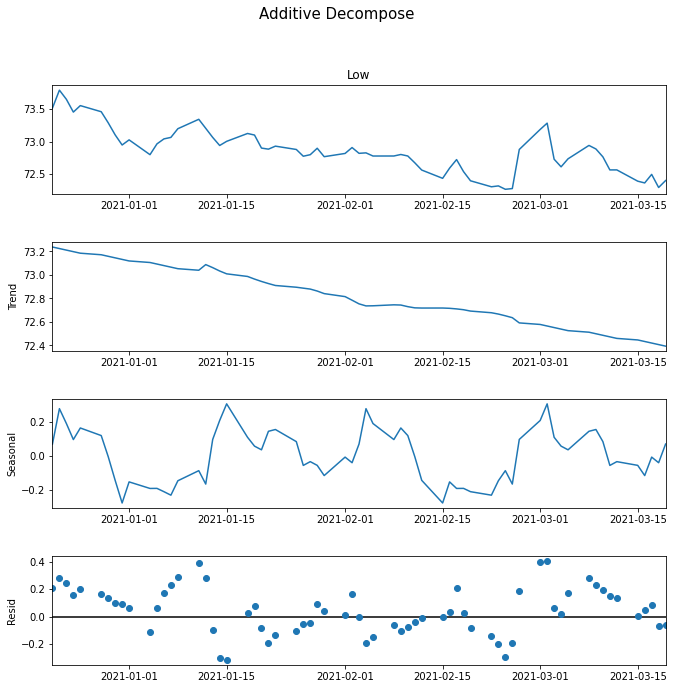

In [145]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
plt.tight_layout(pad=3.08)
plt.show()

In [146]:
# Simple prediction uing shift function. Baseline model

In [147]:
f_birth_baseline = f_birth.copy()

In [148]:
f_birth_baseline['Low_forecast'] = f_birth_baseline['Low'].shift(1)

In [149]:
f_birth_baseline.head()

,Low,Low_forecast
Date,,
2020-12-21,73.512802,NaN
2020-12-22,73.786697,73.512802
2020-12-23,73.646400,73.786697
2020-12-24,73.450798,73.646400
2020-12-25,73.550003,73.450798


In [150]:
# Calculate mean squared error of this simple baseline model

In [151]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [152]:
f_birth_baseline.dropna(inplace=True) # drop nan value

In [153]:
f_birth_baseline_error = np.sqrt(mean_squared_error(f_birth_baseline['Low'], f_birth_baseline['Low_forecast'])) # take square root of mse
f_birth_baseline_error

0.1623550302453441

In [154]:
# ARIMA Autoregressive(p) Integrated(d) Moving average(q)
#Finding p,d,q values for a simple model

In [155]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import root_mean_square_error
#from statsmodels.tsa.stattools import r_square_error
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller

In [156]:
f_birth.head()

,Low
Date,
2020-12-21,73.512802
2020-12-22,73.786697
2020-12-23,73.646400
2020-12-24,73.450798
2020-12-25,73.550003


In [157]:
result = adfuller(f_birth_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.458469
p-value: 0.125909


In [158]:
# chek for p value, it the p value is less than 0.05 we can say the data is stationary

In [159]:
# # as p value is less than 0.05 we can say the data is stationary

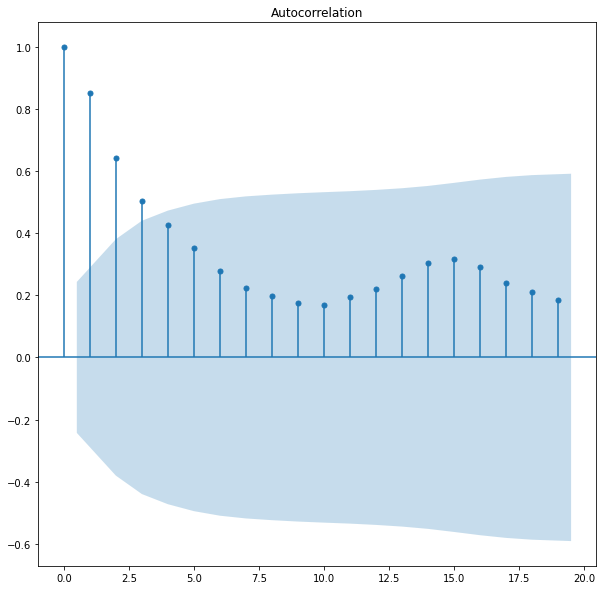

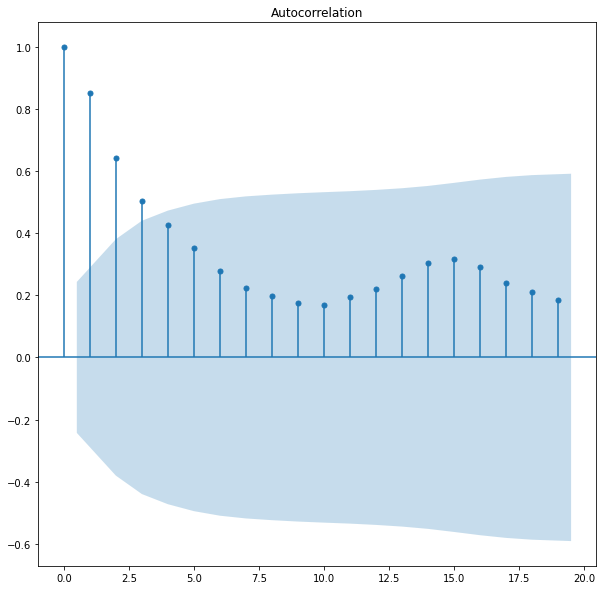

In [160]:
plot_acf(f_birth_series)

In [161]:
# p value could be 2,3

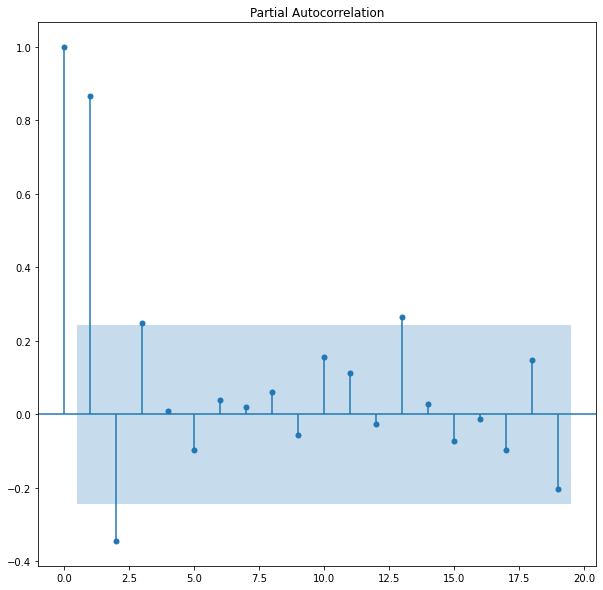

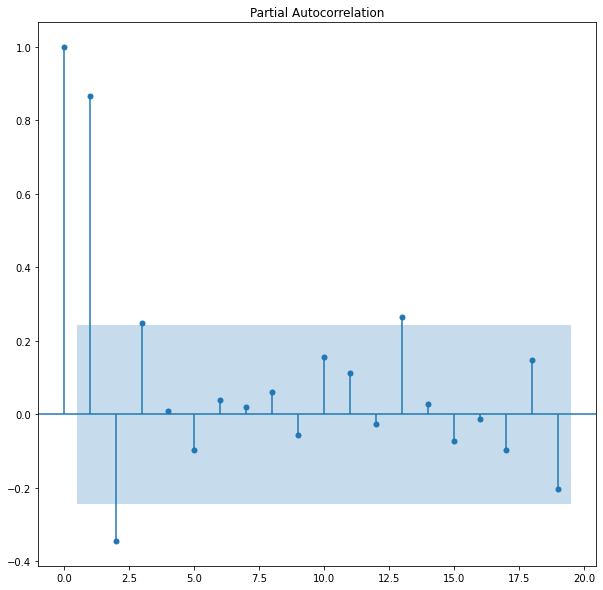

In [162]:
# plot_pacf is to calculate value of q
plot_pacf(f_birth_series)

In [163]:
# q  value could be 2,3

In [164]:
# Simple Modelling

In [165]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels as sm
import warnings

In [166]:
# Split the dataset
split = int(len(f_birth_series) * 0.9)
f_birth_series_train = f_birth_series[:split]
f_birth_series_test = f_birth_series[split:]

In [167]:
model = ARIMA(f_birth_series_train, order=(1,1,2))
model_fit = model.fit()
print('AIC Score', model_fit.aic)
print('BIC Score', model_fit.bic)

model_forecast = model_fit.forecast(steps=5)[0]
# model_forecast 
#print('RMSE -', np.sqrt(mean_squared_error(f_birth_series_test, model_forecast)))
#print('R2ERROR -', np(r_squared_error(f_birth_series_test, model_forecast)))
#print('MAPE -', np.sqrt(mean_absolute_percentage_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('hqic_sigma', model_fit.hqic_sigma)
#print('interquartile range of error', model_fit.iqr)

AIC Score -46.23372159397047
BIC Score -36.01846525479772


In [168]:
model_forecast # Low values

array([72.67426455, 72.60522563, 72.5567019 , 72.52111197, 72.49367616])

In [169]:
# Modelling using a function to hyper tune the ARIMA parameters, split data

In [170]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = np.sqrt(mean_squared_error(test, predictions))
    return error




# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [171]:
p_values = [1]
d_values = [1] # range(0, 2)
q_values = [2] # range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(f_birth_series, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [172]:
############################################### Close Values ############################################################

In [175]:
import warnings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning) 
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.SARIMAX',
                        FutureWarning)

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [176]:
df= yf.download("INR=X", period = "3mo", interval="1d")
df= df.to_csv('C:\\Users\\Admin\\Documents\\PYTHON\\California birth rate stock\\usdinr.csv')
f_birth = pd.read_csv('usdinr.csv', parse_dates= [0], index_col=[0])

#f_birth = pd.read_df('df', parse_dates= [0], index_col=[0])

[*********************100%***********************]  1 of 1 completed


In [177]:
f_birth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,73.603600,74.092003,73.512802,73.603600,73.603600,0
2020-12-22,73.935303,74.202301,73.786697,73.935303,73.935303,0
2020-12-23,74.005501,74.269997,73.646400,74.269997,74.269997,0
2020-12-24,73.839798,74.099998,73.450798,73.839798,73.839798,0
2020-12-25,73.557800,73.800003,73.550003,73.557800,73.557800,0


In [178]:
f_birth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,72.682999,72.781998,72.392303,72.682999,72.682999,0
2021-03-16,72.515297,72.945999,72.365501,72.515297,72.515297,0
2021-03-17,72.515701,73.008003,72.496300,72.515602,72.515602,0
2021-03-18,72.569801,72.744003,72.295601,72.295601,72.295601,0
2021-03-19,72.669998,72.703003,72.402000,72.459999,72.459999,0


In [179]:
f_birth = f_birth.drop(["Open","High","Low","Adj Close", "Volume"], axis=1) # Considering only Close values

In [180]:
f_birth

,Close
Date,
2020-12-21,73.603600
2020-12-22,73.935303
2020-12-23,74.269997
2020-12-24,73.839798
2020-12-25,73.557800
...,...
2021-03-15,72.682999
2021-03-16,72.515297
2021-03-17,72.515602


In [181]:
f_birth.Close

Date
2020-12-21    73.603600
2020-12-22    73.935303
2020-12-23    74.269997
2020-12-24    73.839798
2020-12-25    73.557800
                ...    
2021-03-15    72.682999
2021-03-16    72.515297
2021-03-17    72.515602
2021-03-18    72.295601
2021-03-19    72.459999
Name: Close, Length: 65, dtype: float64

In [182]:
f_birth.count()

Close    65
dtype: int64

In [183]:
f_birth.describe()

,Close
count,65.000000
mean,73.044071
std,0.400115
min,72.295601
25%,72.784798
50%,72.995903
75%,73.309402
max,74.269997


In [184]:
f_birth.mode()

,Close
0,72.295601
1,72.376999
2,72.400002
3,72.444000
4,72.459999
...,...
60,73.603600
61,73.689003
62,73.839798
63,73.935303


In [185]:
type(f_birth.Close)  # pandas.core.series.Series

pandas.core.series.Series

In [186]:
#Convret dataframe into series which is needed by models.

f_birth_series = f_birth.values
# f_birth_series

In [187]:
# Visualise the Trend

<AxesSubplot:xlabel='Date'>

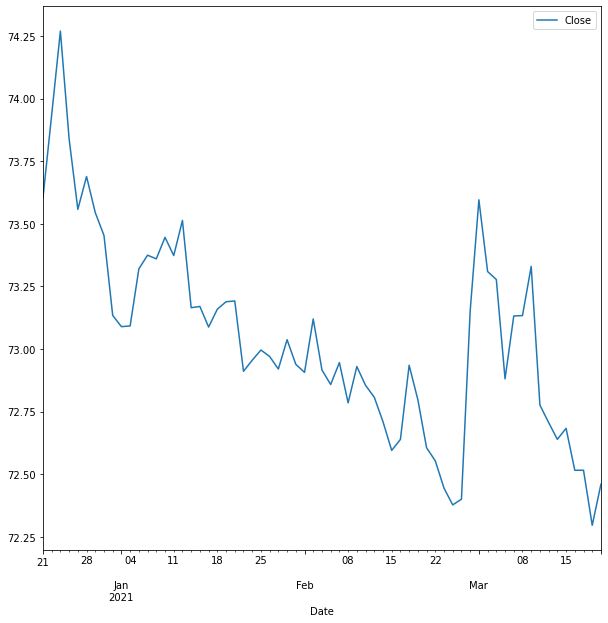

In [188]:
f_birth.plot()

<AxesSubplot:xlabel='Date'>

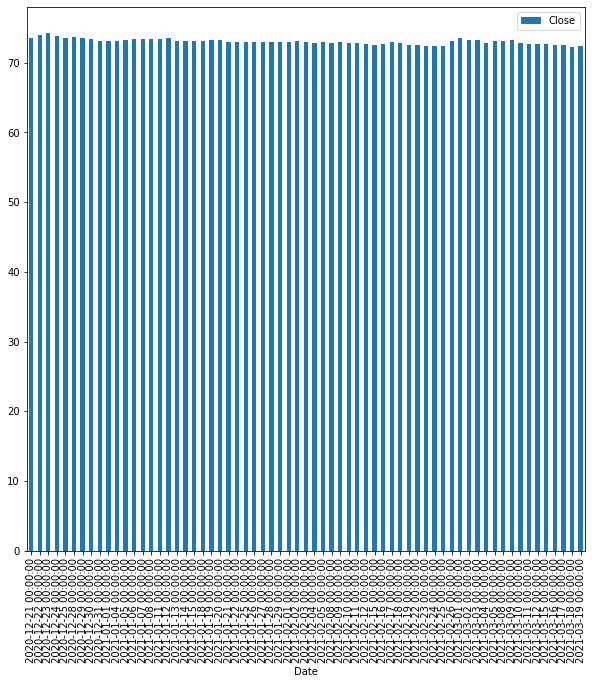

In [189]:
f_birth.plot(kind="bar")

<AxesSubplot:ylabel='Date'>

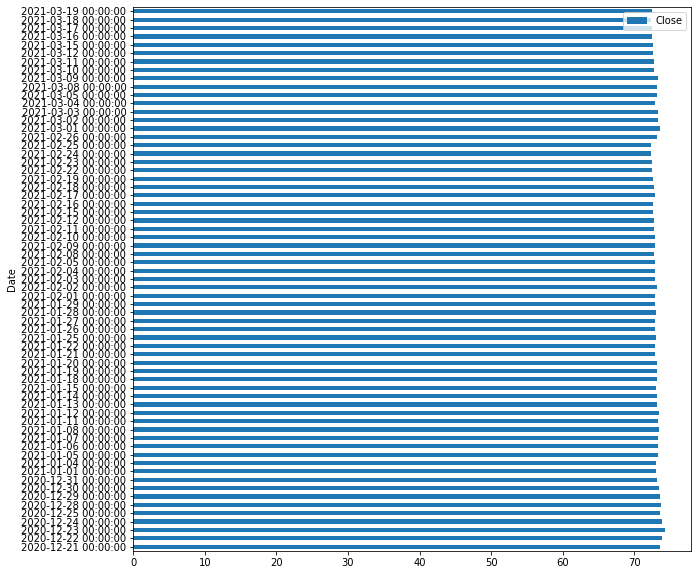

In [190]:
f_birth.plot(kind="barh")

<AxesSubplot:ylabel='Frequency'>

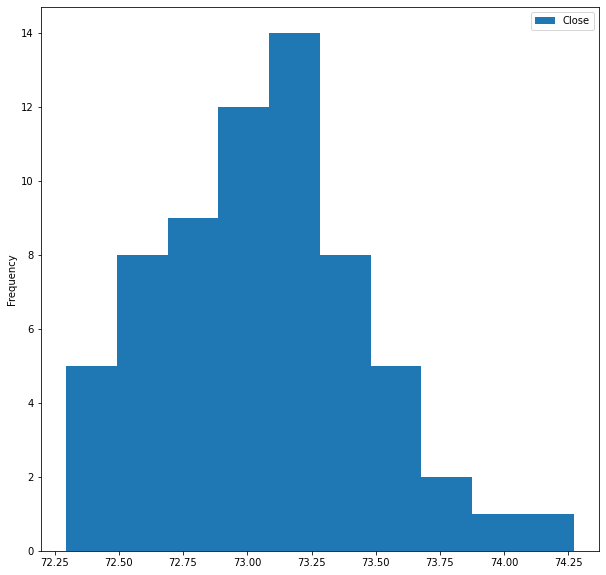

In [191]:
f_birth.plot(kind="hist")

<AxesSubplot:xlabel='Date'>

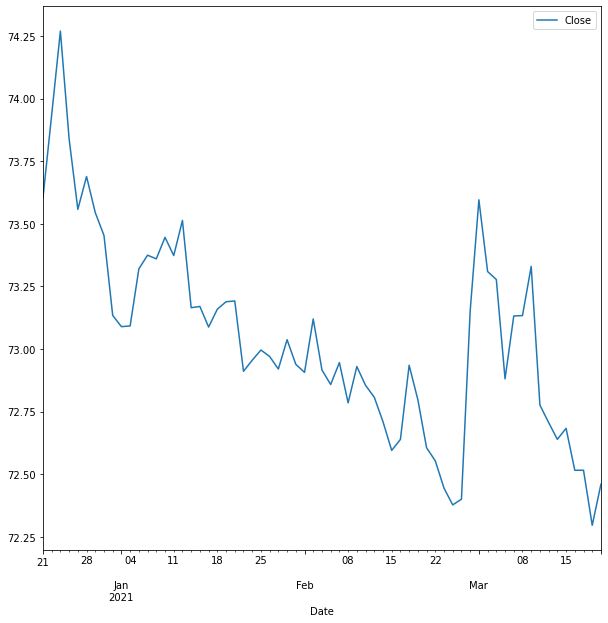

In [192]:
f_birth.plot(kind="line")

<AxesSubplot:>

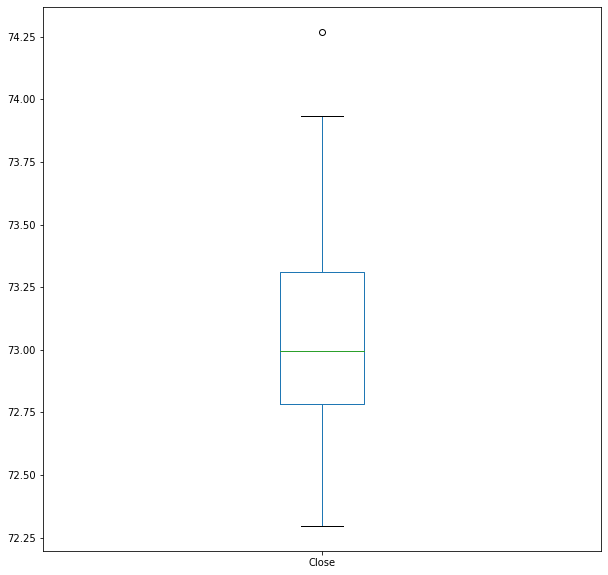

In [193]:
f_birth.plot(kind="box")

<AxesSubplot:xlabel='Close', ylabel='Density'>

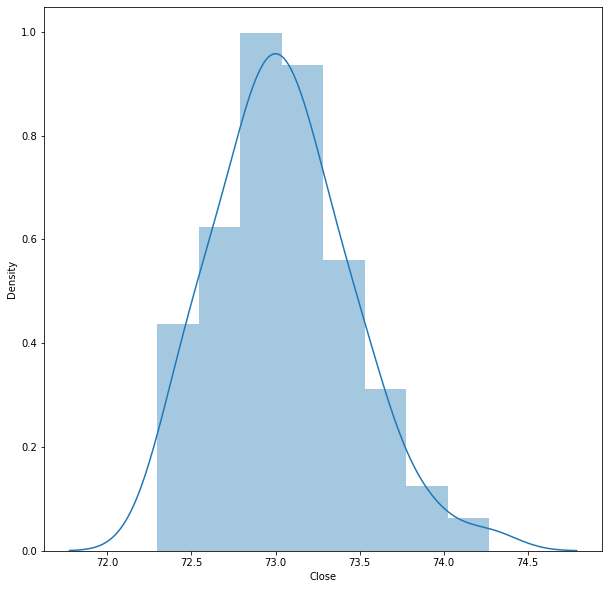

In [195]:
import seaborn as sb
sb.distplot(f_birth['Close'], kde= True)

<AxesSubplot:ylabel='Density'>

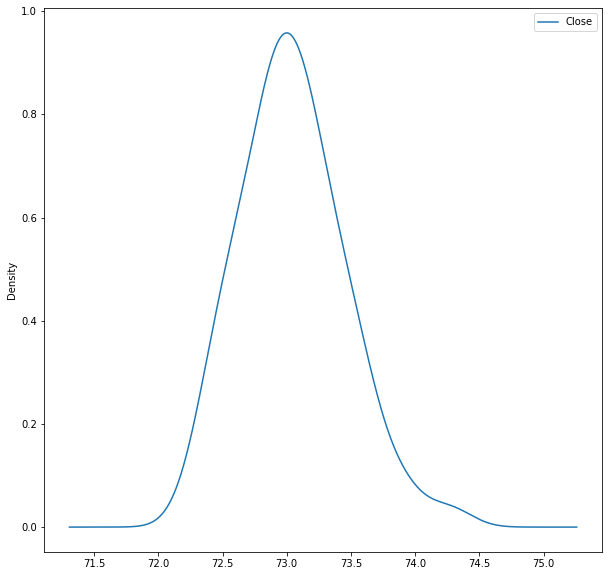

In [196]:
f_birth.plot(kind="kde")

<AxesSubplot:xlabel='Date'>

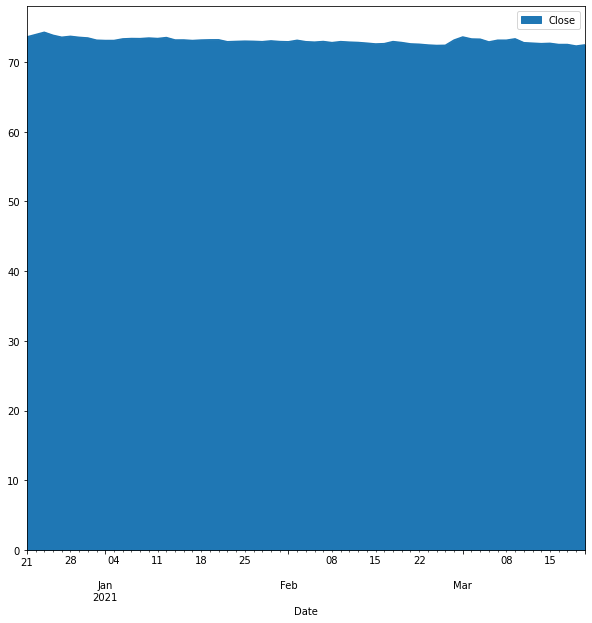

In [197]:
f_birth.plot(kind="area")

<AxesSubplot:xlabel='Date'>

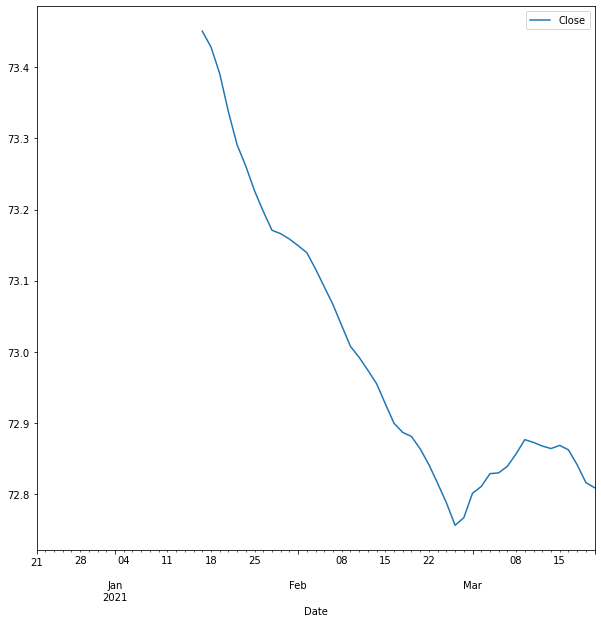

In [198]:
f_birth_mean = f_birth.rolling(window = 20).mean() # easier to observe the trend
f_birth_mean.plot()

In [199]:
# Decompose time series into its components

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [200]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(f_birth['Close'], model='multiplicative', extrapolate_trend='freq', period=int(len(f_birth)/2))

In [201]:
# Additive Decomposition
result_add = seasonal_decompose(f_birth['Close'], model='additive', extrapolate_trend='freq', period=int(len(f_birth)/2))


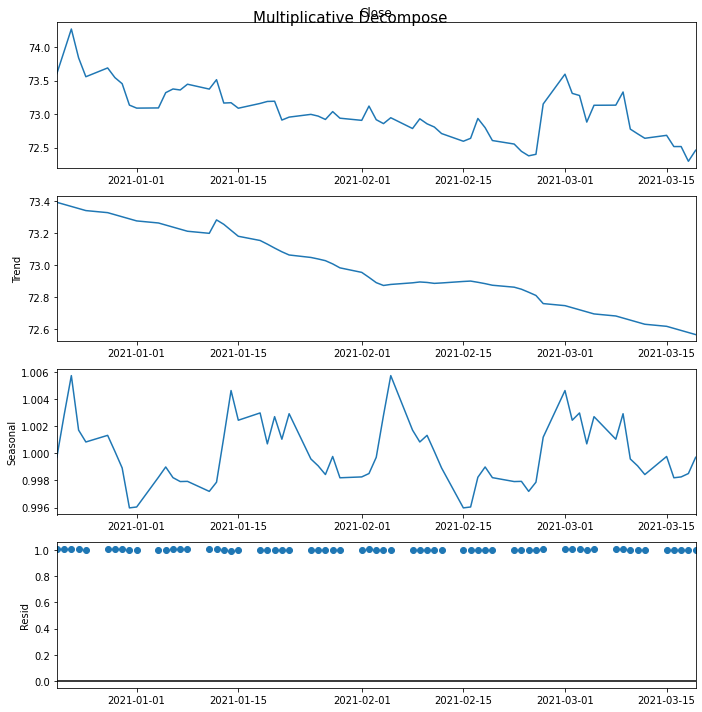

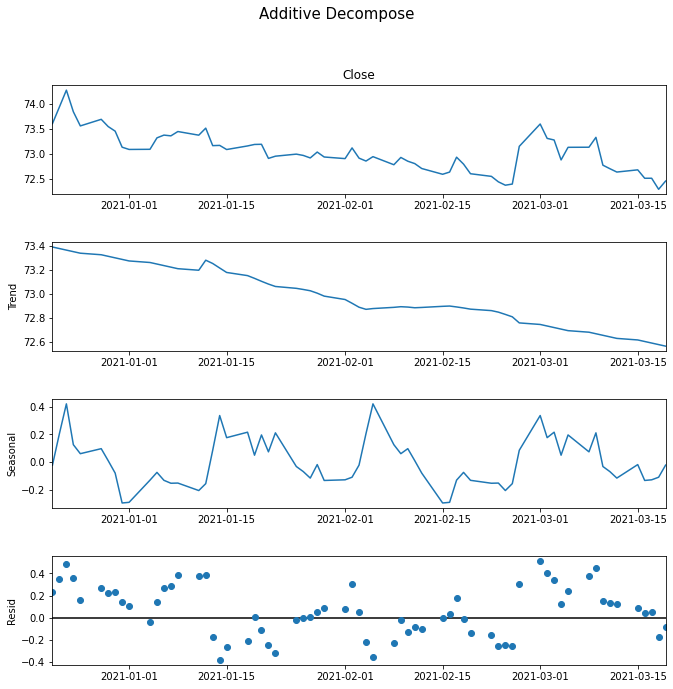

In [202]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
plt.tight_layout(pad=3.08)
plt.show()

In [203]:
# Simple prediction uing shift function. Baseline model

In [204]:
f_birth_baseline = f_birth.copy()

In [205]:
f_birth_baseline['Close_forecast'] = f_birth_baseline['Close'].shift(1)

In [206]:
f_birth_baseline.head()

,Close,Close_forecast
Date,,
2020-12-21,73.603600,NaN
2020-12-22,73.935303,73.603600
2020-12-23,74.269997,73.935303
2020-12-24,73.839798,74.269997
2020-12-25,73.557800,73.839798


In [207]:
# Calculate mean squared error of this simple baseline model

from sklearn.metrics import mean_squared_error
import numpy as np

In [208]:
f_birth_baseline.dropna(inplace=True) # drop nan value

In [209]:
f_birth_baseline_error = np.sqrt(mean_squared_error(f_birth_baseline['Close'], f_birth_baseline['Close_forecast'])) # take square root of mse
f_birth_baseline_error


0.2104939337845717

In [210]:

# ARIMA Autoregressive(p) Integrated(d) Moving average(q)
#Finding p,d,q values for a simple model


In [211]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import root_mean_square_error
#from statsmodels.tsa.stattools import r_square_error
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller

In [212]:
f_birth.head()


,Close
Date,
2020-12-21,73.603600
2020-12-22,73.935303
2020-12-23,74.269997
2020-12-24,73.839798
2020-12-25,73.557800


In [213]:
result = adfuller(f_birth_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.154671
p-value: 0.223107


In [214]:
# chek for p value, it the p value is less than 0.05 we can say the data is stationary

# # as p value is less than 0.05 we can say the data is stationary

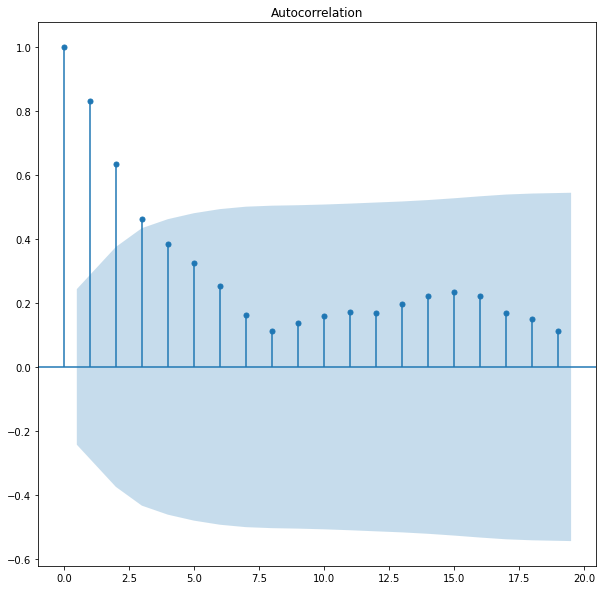

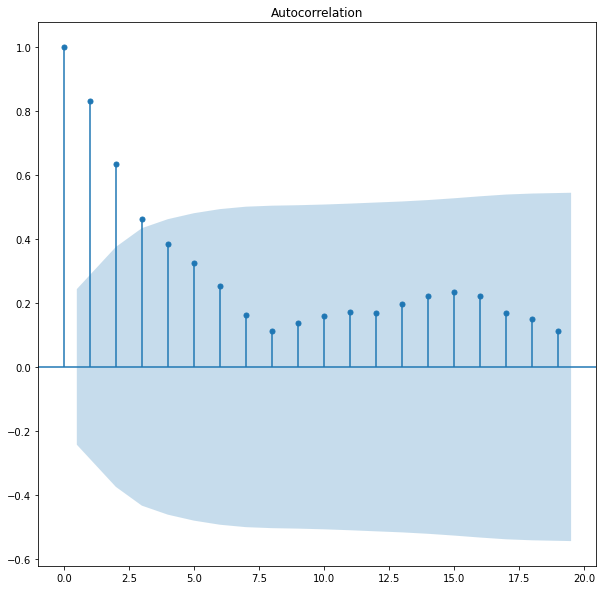

In [215]:
plot_acf(f_birth_series)

In [216]:
# p value could be 2,3

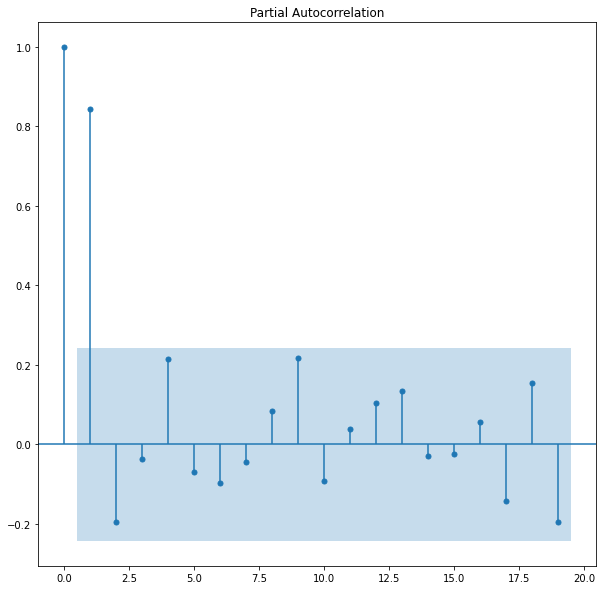

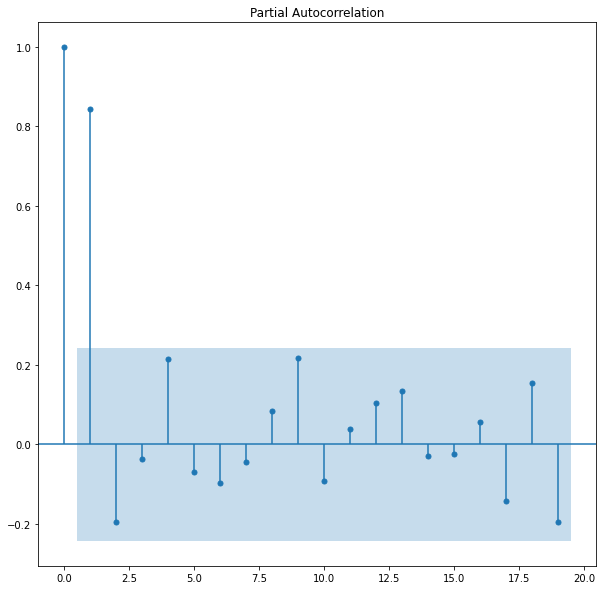

In [217]:
# plot_pacf is to calculate value of q
plot_pacf(f_birth_series)

In [218]:
# q  value could be 2,3

In [219]:
# Simple Modelling

In [220]:

from statsmodels.tsa.arima_model import ARIMA
import statsmodels as sm
import warnings


In [221]:
# Split the dataset
split = int(len(f_birth_series) * 0.9)
f_birth_series_train = f_birth_series[:split]
f_birth_series_test = f_birth_series[split:]


In [222]:
model = ARIMA(f_birth_series_train, order=(1,1,2))
model_fit = model.fit()
print('AIC Score', model_fit.aic)
print('BIC Score', model_fit.bic)

model_forecast = model_fit.forecast(steps=5)[0]
# model_forecast 
#print('RMSE -', np.sqrt(mean_squared_error(f_birth_series_test, model_forecast)))
#print('R2ERROR -', np(r_squared_error(f_birth_series_test, model_forecast)))
#print('MAPE -', np.sqrt(mean_absolute_percentage_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('hqic_sigma', model_fit.hqic_sigma)
#print('interquartile range of error', model_fit.iqr)

AIC Score -9.280291276340023
BIC Score 0.9349650628327275


In [223]:
model_forecast # Close values

array([72.6647889 , 72.661172  , 72.65376104, 72.6438809 , 72.63239381])

In [224]:
# Modelling using a function to hyper tune the ARIMA parameters, split data

In [278]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = np.sqrt(mean_squared_error(test, predictions))
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))



In [279]:
p_values = [1]
d_values = [0] # range(0, 2)
q_values = [0] # range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(f_birth_series, p_values, d_values, q_values)
                       

ARIMA(1, 0, 0) RMSE=0.267
Best ARIMA(1, 0, 0) RMSE=0.267


In [280]:
############################################### Volume Values ############################################################

In [281]:


import warnings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning) 
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.SARIMAX',
                        FutureWarning)

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [282]:

df= yf.download("INR=X", period = "1mo", interval="1d")
df= df.to_csv('C:\\Users\\Admin\\Documents\\PYTHON\\California birth rate stock\\usdinr.csv')
f_birth = pd.read_csv('usdinr.csv', parse_dates= [0], index_col=[0])

#f_birth = pd.read_df('df', parse_dates= [0], index_col=[0])

[*********************100%***********************]  1 of 1 completed


In [283]:
f_birth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,73.603600,74.092003,73.512802,73.603600,73.603600,0
2020-12-22,73.935303,74.202301,73.786697,73.935303,73.935303,0
2020-12-23,74.005501,74.269997,73.646400,74.269997,74.269997,0
2020-12-24,73.839798,74.099998,73.450798,73.839798,73.839798,0
2020-12-25,73.557800,73.800003,73.550003,73.557800,73.557800,0


In [284]:
f_birth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,72.682999,72.781998,72.392303,72.682999,72.682999,0
2021-03-16,72.515297,72.945999,72.365501,72.515297,72.515297,0
2021-03-17,72.515701,73.008003,72.496300,72.515602,72.515602,0
2021-03-18,72.569801,72.744003,72.295601,72.295601,72.295601,0
2021-03-19,72.669998,72.703003,72.402000,72.459999,72.459999,0


In [233]:

f_birth = f_birth.drop(["Open","High","Low","Adj Close", "Close"], axis=1) # Considering only Volume values

In [234]:
f_birth

,Volume
Date,
2020-12-21,0
2020-12-22,0
2020-12-23,0
2020-12-24,0
2020-12-25,0
...,...
2021-03-15,0
2021-03-16,0
2021-03-17,0


In [235]:
f_birth.Volume

Date
2020-12-21    0
2020-12-22    0
2020-12-23    0
2020-12-24    0
2020-12-25    0
             ..
2021-03-15    0
2021-03-16    0
2021-03-17    0
2021-03-18    0
2021-03-19    0
Name: Volume, Length: 65, dtype: int64

In [236]:
f_birth.count()

Volume    65
dtype: int64

In [237]:
f_birth.describe()

,Volume
count,65.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [238]:
f_birth.mode()

,Volume
0,0


In [239]:
type(f_birth.Volume)  # pandas.core.series.Series

pandas.core.series.Series

In [240]:
#Convret dataframe into series which is needed by models.

<AxesSubplot:xlabel='Date'>

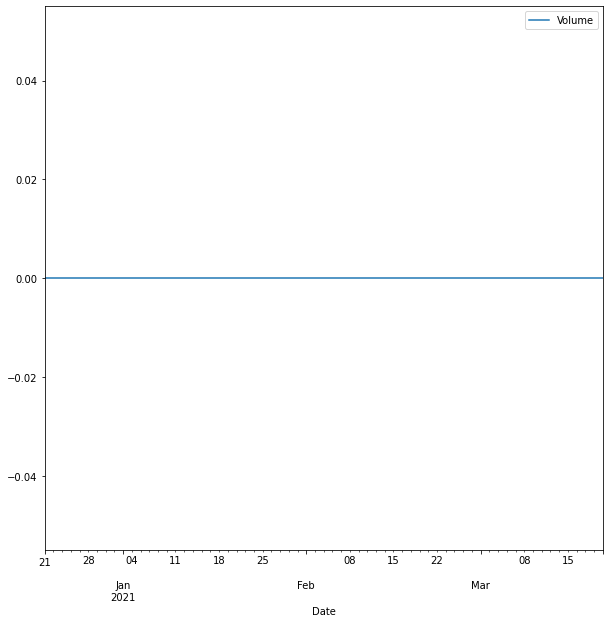

In [241]:
# Visualise the Trend

f_birth.plot()

<AxesSubplot:xlabel='Date'>

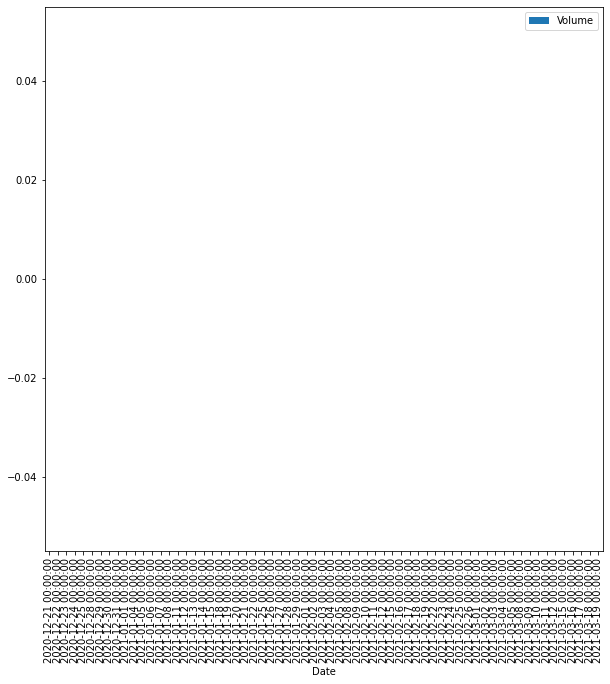

In [242]:
f_birth.plot(kind="bar")

<AxesSubplot:ylabel='Date'>

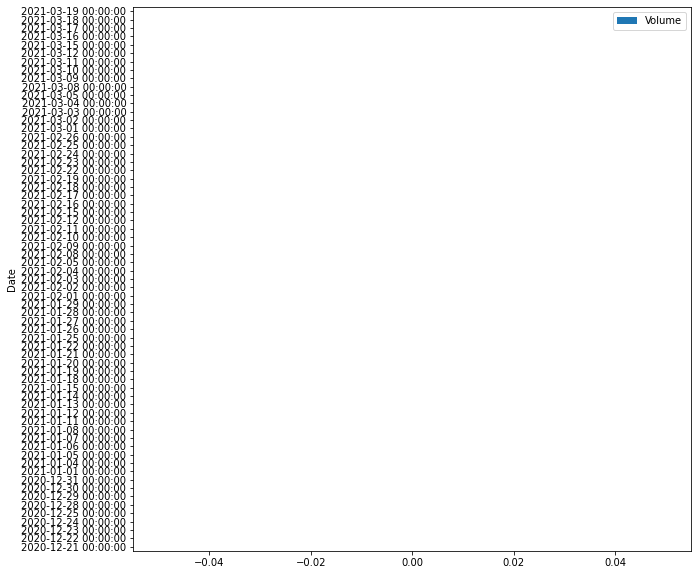

In [243]:
f_birth.plot(kind="barh")

<AxesSubplot:ylabel='Frequency'>

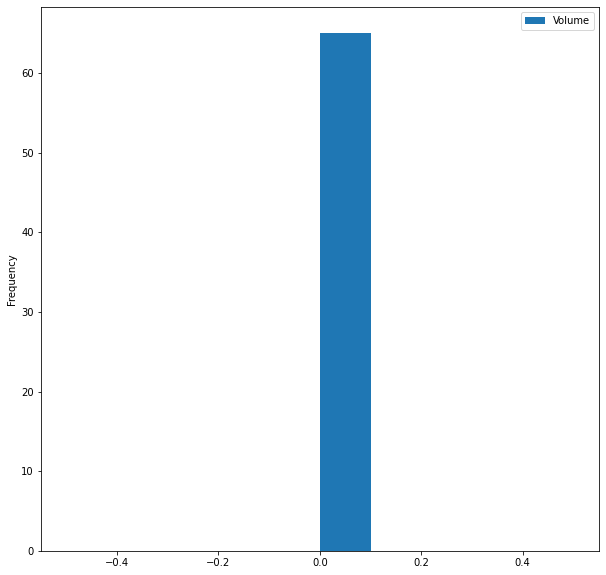

In [244]:
f_birth.plot(kind="hist")

<AxesSubplot:>

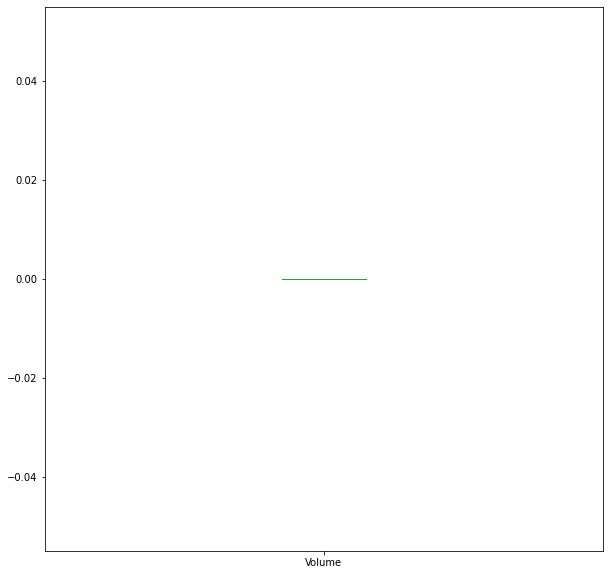

In [245]:
f_birth.plot(kind="box")

<AxesSubplot:xlabel='Volume', ylabel='Density'>

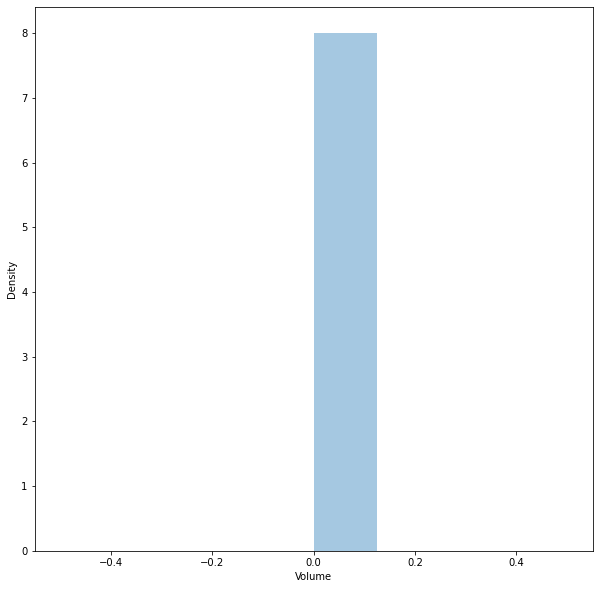

In [246]:
import seaborn as sb
sb.distplot(f_birth['Volume'], kde= True)

LinAlgError: singular matrix

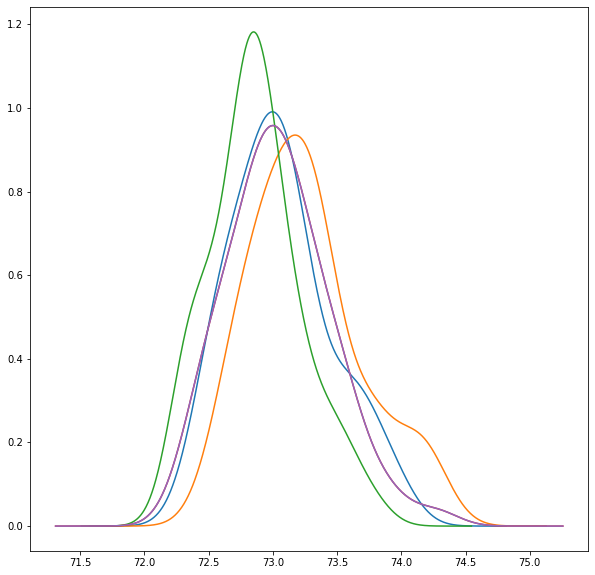

In [285]:
f_birth.plot(kind="kde")

<AxesSubplot:xlabel='Date'>

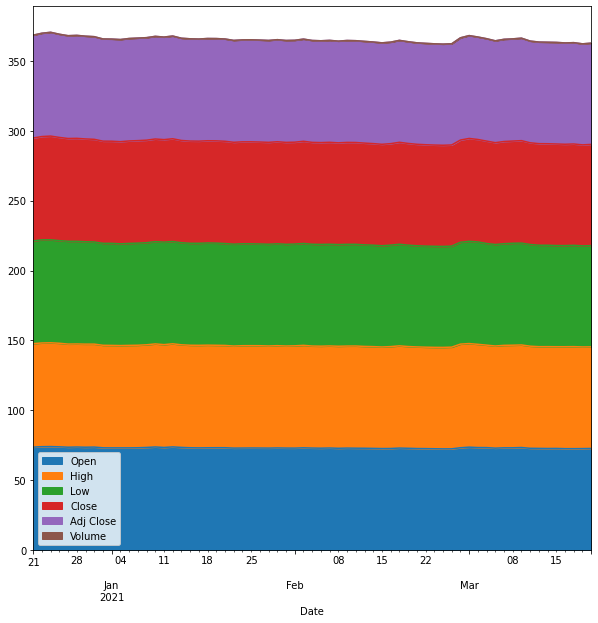

In [286]:
f_birth.plot(kind="area")

<AxesSubplot:xlabel='Date'>

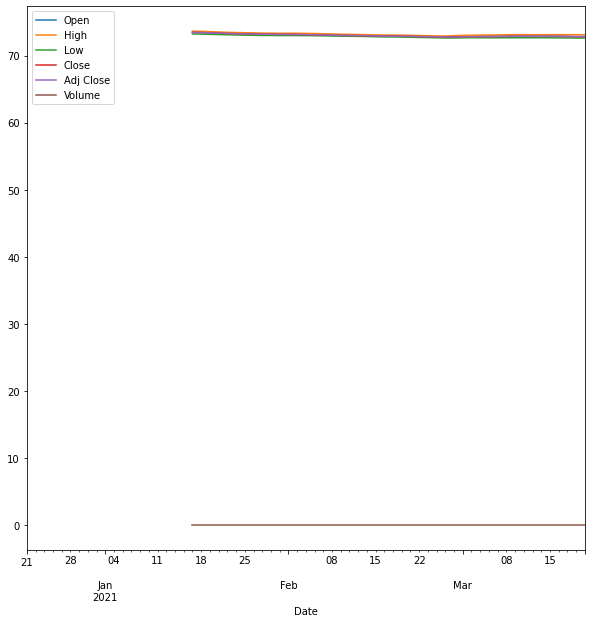

In [288]:
f_birth_mean = f_birth.rolling(window = 20).mean() # easier to observe the trend
f_birth_mean.plot()

In [289]:
# Decompose time series into its components

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [290]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(f_birth['Volume'], model='multiplicative', extrapolate_trend='freq', period=int(len(f_birth)/2))

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [292]:
# Additive Decomposition
result_add = seasonal_decompose(f_birth['Volume'], model='additive', extrapolate_trend='freq', period=int(len(f_birth)/2))

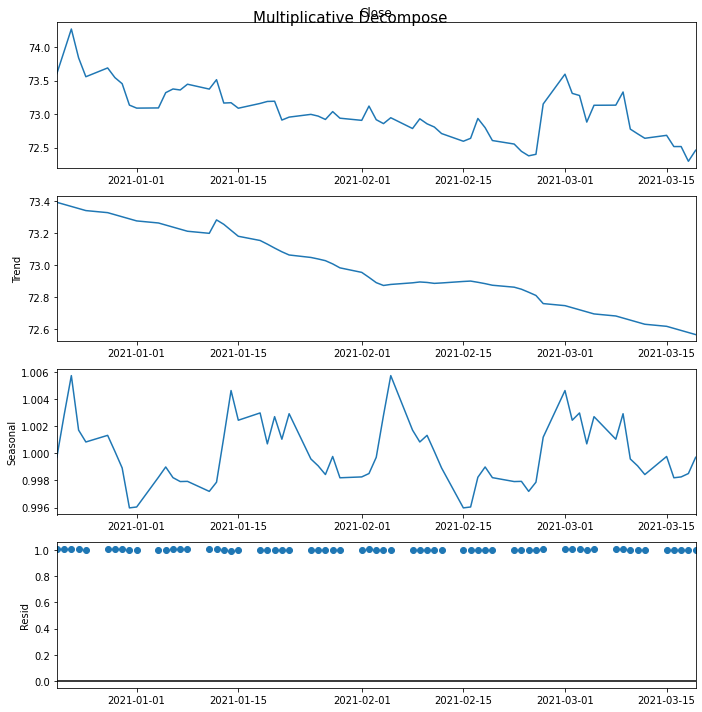

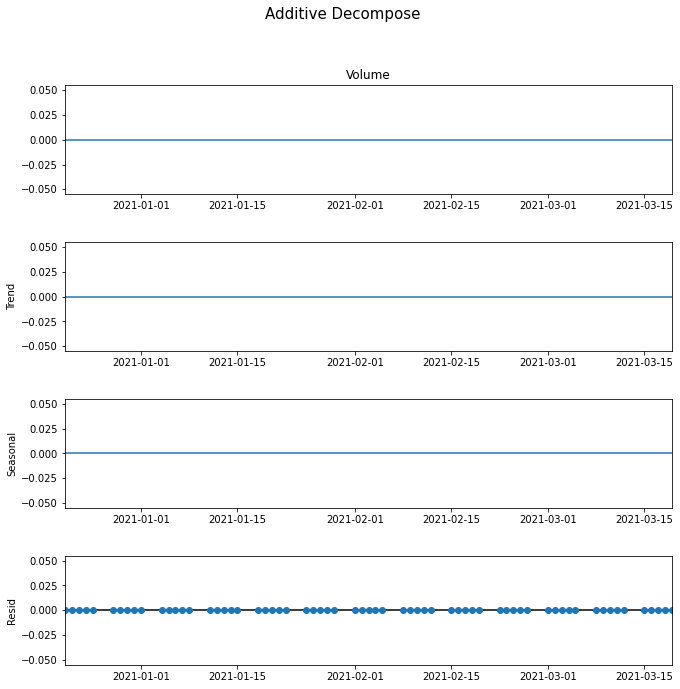

In [293]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
plt.tight_layout(pad=3.08)
plt.show()

In [294]:
# Simple prediction uing shift function. Baseline model


f_birth_baseline = f_birth.copy()

In [295]:
f_birth_baseline['Volume_forecast'] = f_birth_baseline['Volume'].shift(1)

In [296]:
f_birth_baseline.head()

,Open,High,Low,Close,Adj Close,Volume,Volume_forecast
Date,,,,,,,
2020-12-21,73.603600,74.092003,73.512802,73.603600,73.603600,0,NaN
2020-12-22,73.935303,74.202301,73.786697,73.935303,73.935303,0,0.0
2020-12-23,74.005501,74.269997,73.646400,74.269997,74.269997,0,0.0
2020-12-24,73.839798,74.099998,73.450798,73.839798,73.839798,0,0.0
2020-12-25,73.557800,73.800003,73.550003,73.557800,73.557800,0,0.0


In [259]:
# Calculate mean squared error of this simple baseline model

from sklearn.metrics import mean_squared_error
import numpy as np

In [260]:
f_birth_baseline.dropna(inplace=True) # drop nan value

In [261]:
f_birth_baseline_error = np.sqrt(mean_squared_error(f_birth_baseline['Volume'], f_birth_baseline['Volume_forecast'])) # take square root of mse
f_birth_baseline_error

0.0

In [262]:

# ARIMA Autoregressive(p) Integrated(d) Moving average(q)
#Finding p,d,q values for a simple model

In [263]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import root_mean_square_error
#from statsmodels.tsa.stattools import r_square_error
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller


In [264]:
f_birth.head()

,Volume
Date,
2020-12-21,0
2020-12-22,0
2020-12-23,0
2020-12-24,0
2020-12-25,0


In [265]:

result = adfuller(f_birth_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.154671
p-value: 0.223107


In [266]:
# chek for p value, it the p value is less than 0.05 we can say the data is stationary

# # as p value is less than 0.05 we can say the data is stationary

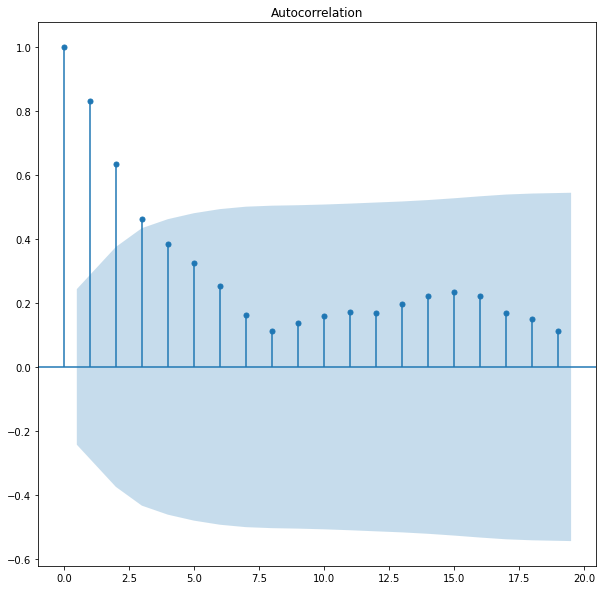

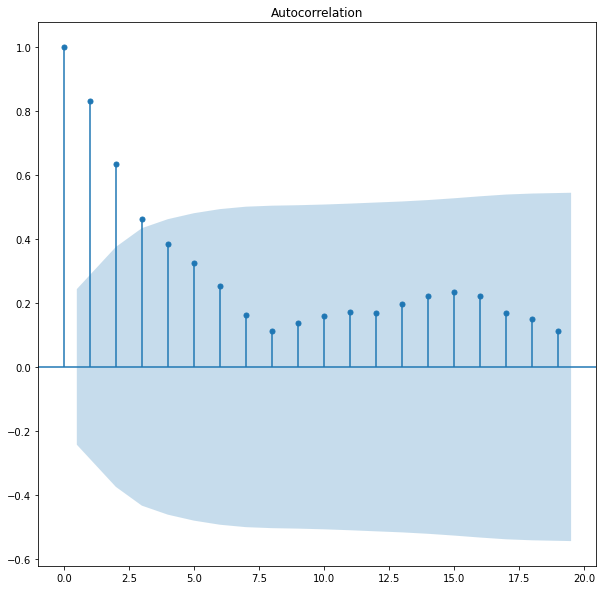

In [267]:
plot_acf(f_birth_series)

# p value could be 2,3


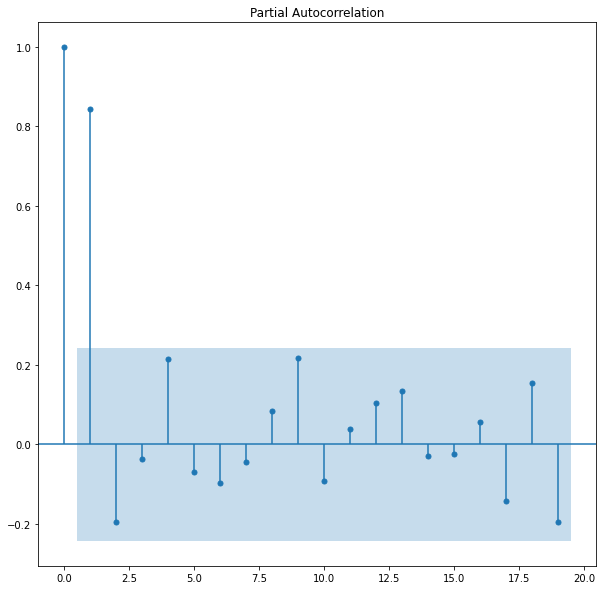

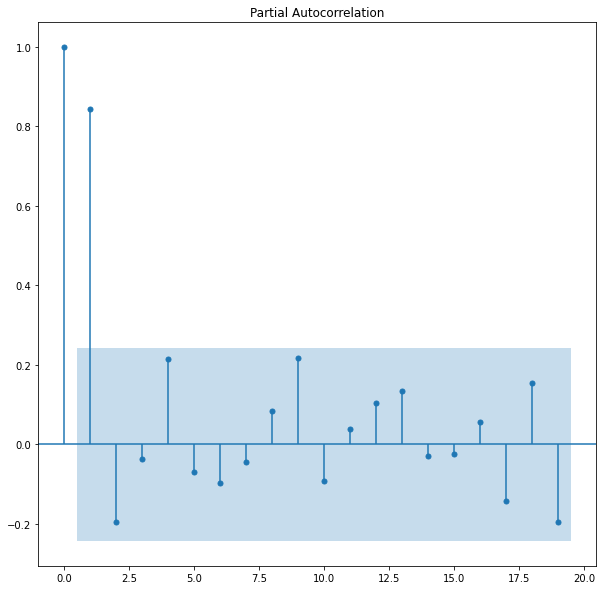

In [268]:
# plot_pacf is to calculate value of q
plot_pacf(f_birth_series)

In [ ]:
# q  value could be 2,3

In [269]:
# Simple Modelling


from statsmodels.tsa.arima_model import ARIMA
import statsmodels as sm
import warnings


In [270]:
# Split the dataset
split = int(len(f_birth_series) * 0.9)
f_birth_series_train = f_birth_series[:split]
f_birth_series_test = f_birth_series[split:]

In [271]:
model = ARIMA(f_birth_series_train, order=(1,1,2))
model_fit = model.fit()
print('AIC Score', model_fit.aic)
print('BIC Score', model_fit.bic)

AIC Score -9.280291276340023
BIC Score 0.9349650628327275


In [272]:
model_forecast = model_fit.forecast(steps=5)[0]
# model_forecast 
#print('RMSE -', np.sqrt(mean_squared_error(f_birth_series_test, model_forecast)))
#print('R2ERROR -', np(r_squared_error(f_birth_series_test, model_forecast)))
#print('MAPE -', np.sqrt(mean_absolute_percentage_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('hqic_sigma', model_fit.hqic_sigma)
#print('interquartile range of error', model_fit.iqr)

In [273]:
model_forecast #Volume values

array([72.6647889 , 72.661172  , 72.65376104, 72.6438809 , 72.63239381])

In [274]:
# Modelling using a function to hyper tune the ARIMA parameters, split data

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = np.sqrt(mean_squared_error(test, predictions))
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [276]:
p_values = [1]
d_values = [0] # range(0, 2)
q_values = [0] # range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(f_birth_series, p_values, d_values, q_values)

ARIMA(1, 0, 0) RMSE=0.267
Best ARIMA(1, 0, 0) RMSE=0.267
